# Predicting Employee Attrition - Final Exploration

Contains plots to be taken into final presentation

In [1]:
# Import common libraries
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set project paths
PROJECT_ROOT = Path('..').resolve()  # project root (one level up from notebooks/)
# Agora usamos o link raw do GitHub em vez do caminho local
RAW_FILE = "https://raw.githubusercontent.com/Matheuskcode/edsb/main/data/raw/HR_Attrition_Dataset.csv"

# Keep data/clean folder for outputs
DATA_CLEAN = PROJECT_ROOT / 'data' / 'clean'
DATA_CLEAN.mkdir(parents=True, exist_ok=True)

# Remembered columns
COLUMNS = [
    'Age','Attrition','BusinessTravel','DailyRate','Department','DistanceFromHome',
    'Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction',
    'Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction',
    'MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime',
    'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours',
    'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
    'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'
]

# Helper to load the provided CSV file
def load_data_from_provided():
    try:
        print(f'Loading data from {RAW_FILE}')
        return pd.read_csv(RAW_FILE)
    except Exception as e:
        print("Erro ao carregar dataset:", e)
        return None

# Example usage
df = load_data_from_provided()
if df is not None:
    print('Loaded dataframe with shape:', df.shape)
    display(df.head())

Loading data from https://raw.githubusercontent.com/Matheuskcode/edsb/main/data/raw/HR_Attrition_Dataset.csv
Loaded dataframe with shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# PLOTS
## Starting with 10 more relevant, vide Spearman

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4265014494.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = data.groupby(x_col)["_Attrition_bin"].mean()


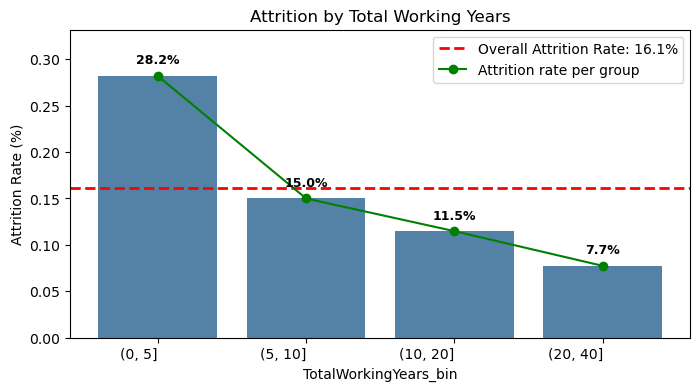

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4265014494.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = data.groupby(x_col)["_Attrition_bin"].mean()


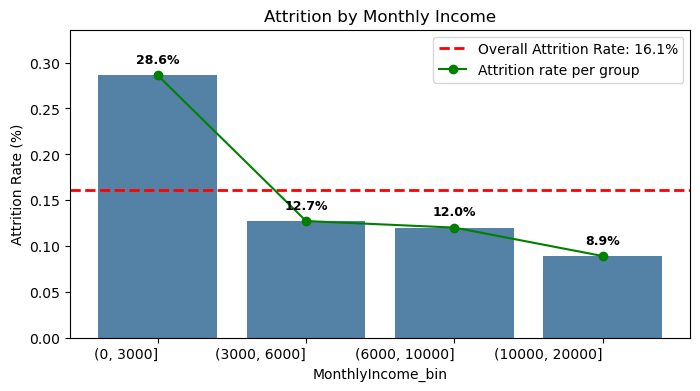

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4265014494.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = data.groupby(x_col)["_Attrition_bin"].mean()


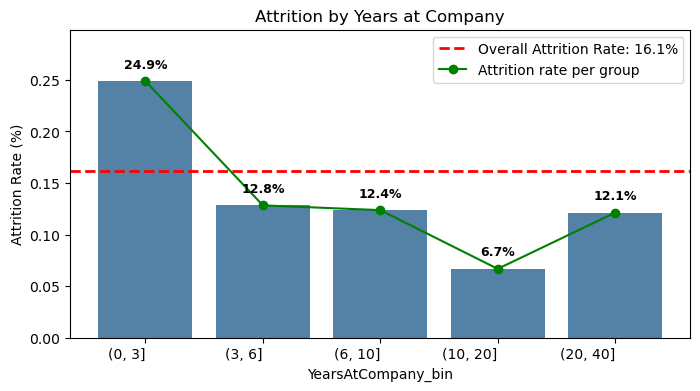

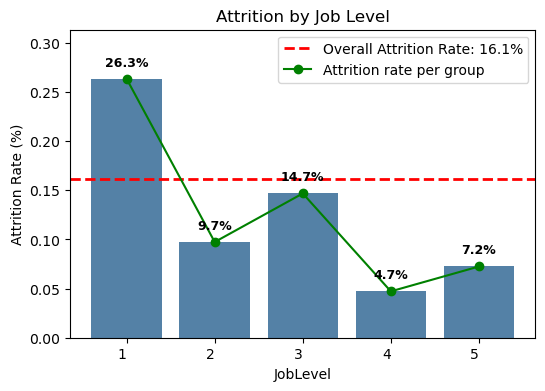

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4265014494.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = data.groupby(x_col)["_Attrition_bin"].mean()


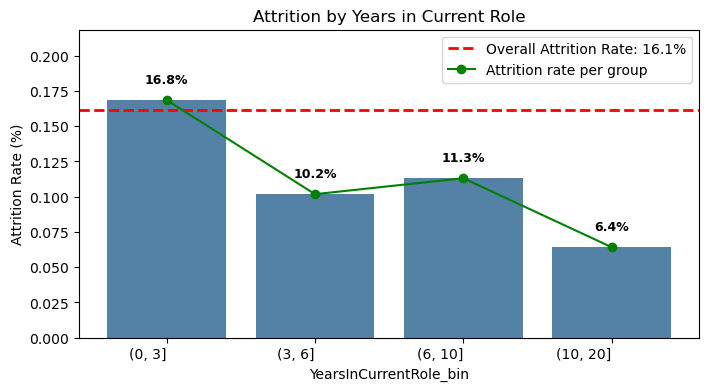

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4265014494.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = data.groupby(x_col)["_Attrition_bin"].mean()


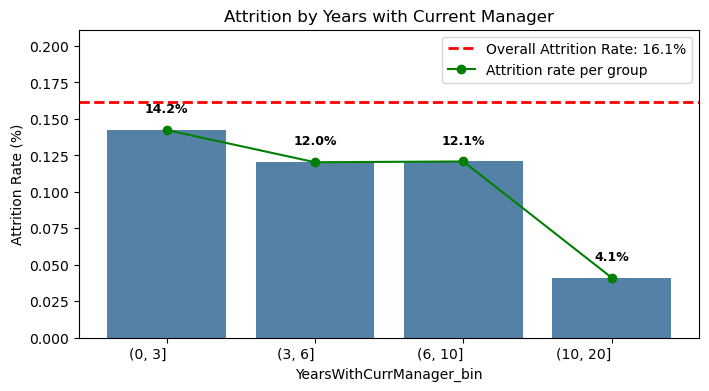

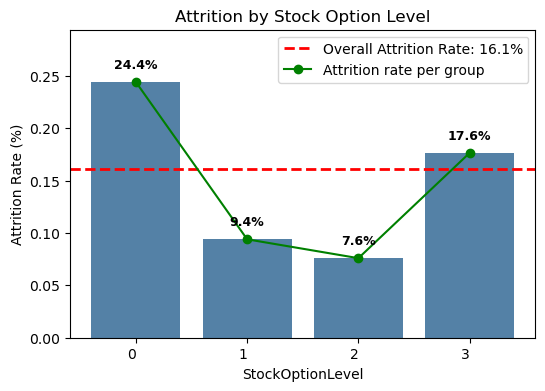

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4265014494.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = data.groupby(x_col)["_Attrition_bin"].mean()


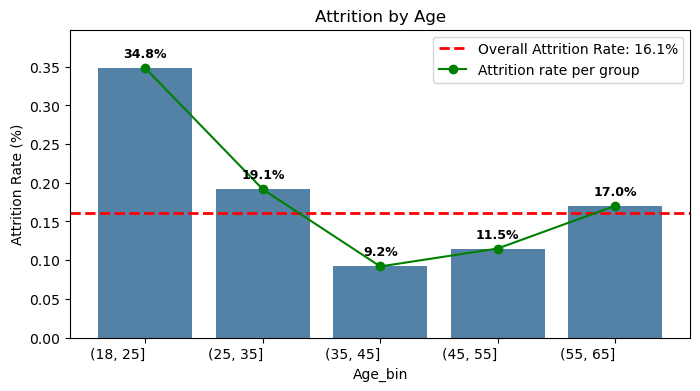

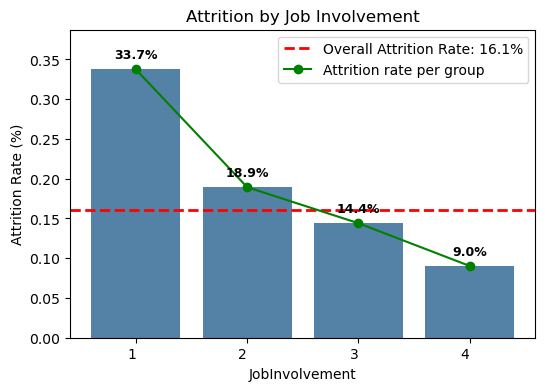

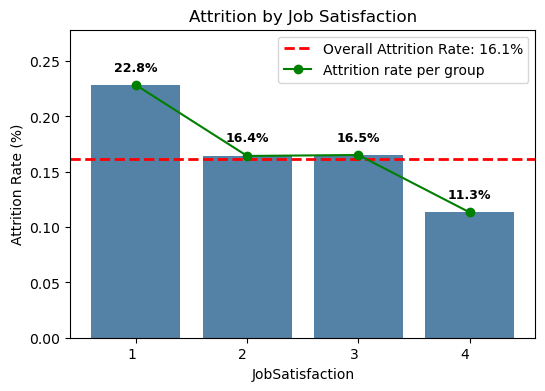

In [14]:
# ============================================
# Top 10 Variables Most Correlated with Attrition
# With bins for continuous variables + mean line + per-group line
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recreate binary column for attrition
df["_Attrition_bin"] = df["Attrition"].str.strip().str.lower().map({
    "yes": 1, "sim": 1, "true": 1, "1": 1,
    "no": 0, "nao": 0, "não": 0, "false": 0, "0": 0
})

# Overall attrition mean (proportion)
overall_mean = df["_Attrition_bin"].mean()

# Helper function for plotting with mean line + per-group line
def plot_attrition_bar(col, title, bins=None, figsize=(8,4), rotation=0):
    data = df.copy()
    if bins is not None:
        # create bins
        data[col+"_bin"] = pd.cut(data[col], bins=bins)
        x_col = col+"_bin"
    else:
        x_col = col
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=x_col, y="_Attrition_bin", data=data,
                color="steelblue", errorbar=None, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Attrition Rate (%)")
    plt.xticks(rotation=rotation, ha="right")

    # Dynamic margin
    max_h = max(p.get_height() for p in ax.patches) if ax.patches else 0
    pad = max(0.05, 0.1 * max_h)
    ax.set_ylim(0, max(max_h, overall_mean) + pad)

    # Overall mean line
    ax.axhline(overall_mean, color="red", linestyle="--", linewidth=2,
               label=f"Overall Attrition Rate: {overall_mean*100:.1f}%")

    # Per-group attrition line
    grp = data.groupby(x_col)["_Attrition_bin"].mean()
    ax.plot(range(len(grp)), grp.values, color="green", linestyle="-", marker="o",
            label="Attrition rate per group")

    ax.legend()

    # Labels on bars (convert to %)
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, h + (pad * 0.2),
                f"{h*100:.1f}%", ha="center", va="bottom", fontsize=9, fontweight="bold")

    plt.show()

# 1. TotalWorkingYears (bins)
plot_attrition_bar("TotalWorkingYears", "Attrition by Total Working Years",
                   bins=[0,5,10,20,40], figsize=(8,4))

# 2. MonthlyIncome (bins)
plot_attrition_bar("MonthlyIncome", "Attrition by Monthly Income",
                   bins=[0,3000,6000,10000,20000], figsize=(8,4))

# 3. YearsAtCompany (bins)
plot_attrition_bar("YearsAtCompany", "Attrition by Years at Company",
                   bins=[0,3,6,10,20,40], figsize=(8,4))

# 4. JobLevel (categorical)
plot_attrition_bar("JobLevel", "Attrition by Job Level", figsize=(6,4))

# 5. YearsInCurrentRole (bins)
plot_attrition_bar("YearsInCurrentRole", "Attrition by Years in Current Role",
                   bins=[0,3,6,10,20], figsize=(8,4))

# 6. YearsWithCurrManager (bins)
plot_attrition_bar("YearsWithCurrManager", "Attrition by Years with Current Manager",
                   bins=[0,3,6,10,20], figsize=(8,4))

# 7. StockOptionLevel (categorical)
plot_attrition_bar("StockOptionLevel", "Attrition by Stock Option Level", figsize=(6,4))

# 8. Age (bins)
plot_attrition_bar("Age", "Attrition by Age",
                   bins=[18,25,35,45,55,65], figsize=(8,4))

# 9. JobInvolvement (categorical)
plot_attrition_bar("JobInvolvement", "Attrition by Job Involvement", figsize=(6,4))

# 10. JobSatisfaction (categorical)
plot_attrition_bar("JobSatisfaction", "Attrition by Job Satisfaction", figsize=(6,4))

In [2]:
# ============================================
# Top 10 Variables Most Correlated with Attrition
# With bins for continuous variables + mean line
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Ensure output directory exists
output_dir = "data/clean/eda/bivariate/figures"
os.makedirs(output_dir, exist_ok=True)

# Recreate binary column for attrition
df["_Attrition_bin"] = df["Attrition"].str.strip().str.lower().map({
    "yes": 1, "sim": 1, "true": 1, "1": 1,
    "no": 0, "nao": 0, "não": 0, "false": 0, "0": 0
})

# Overall attrition mean
overall_mean = df["_Attrition_bin"].mean()

# Helper function for plotting with mean line and saving
def plot_attrition_bar(col, title, bins=None, figsize=(8,4), rotation=0):
    data = df.copy()
    if bins is not None:
        # create bins
        data[col+"_bin"] = pd.cut(data[col], bins=bins)
        x_col = col+"_bin"
    else:
        x_col = col
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=x_col, y="_Attrition_bin", data=data,
                color="steelblue", errorbar=None, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Attrition (%)")
    plt.xticks(rotation=rotation, ha="right")

    # Dynamic margin
    max_h = max(p.get_height() for p in ax.patches) if ax.patches else 0
    pad = max(0.05, 0.1 * max_h)
    ax.set_ylim(0, max(max_h, overall_mean) + pad)

    # Mean line
    ax.axhline(overall_mean, color="red", linestyle="--", linewidth=2,
               label=f"Overall mean: {overall_mean*100:.1f}%")
    ax.legend()

    # Labels on bars
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, h + (pad * 0.2),
                f"{h:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

    # Save figure to workspace path
    safe_title = title.replace(" ", "_").replace("/", "_").lower()
    filepath = os.path.join(output_dir, f"{safe_title}.png")
    plt.savefig(filepath, bbox_inches="tight")
    plt.close(fig)

# Generate and save plots
plot_attrition_bar("TotalWorkingYears", "Attrition by Total Working Years",
                   bins=[0,5,10,20,40], figsize=(8,4))
plot_attrition_bar("MonthlyIncome", "Attrition by Monthly Income",
                   bins=[0,3000,6000,10000,20000], figsize=(8,4))
plot_attrition_bar("YearsAtCompany", "Attrition by Years at Company",
                   bins=[0,3,6,10,20,40], figsize=(8,4))
plot_attrition_bar("JobLevel", "Attrition by Job Level", figsize=(6,4))
plot_attrition_bar("YearsInCurrentRole", "Attrition by Years in Current Role",
                   bins=[0,3,6,10,20], figsize=(8,4))
plot_attrition_bar("YearsWithCurrManager", "Attrition by Years with Current Manager",
                   bins=[0,3,6,10,20], figsize=(8,4))
plot_attrition_bar("StockOptionLevel", "Attrition by Stock Option Level", figsize=(6,4))
plot_attrition_bar("Age", "Attrition by Age",
                   bins=[18,25,35,45,55,65], figsize=(8,4))
plot_attrition_bar("JobInvolvement", "Attrition by Job Involvement", figsize=(6,4))
plot_attrition_bar("JobSatisfaction", "Attrition by Job Satisfaction", figsize=(6,4))

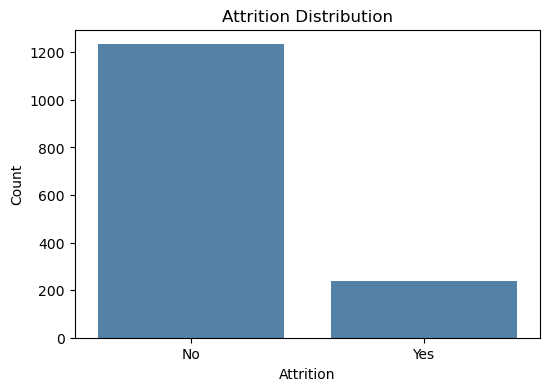

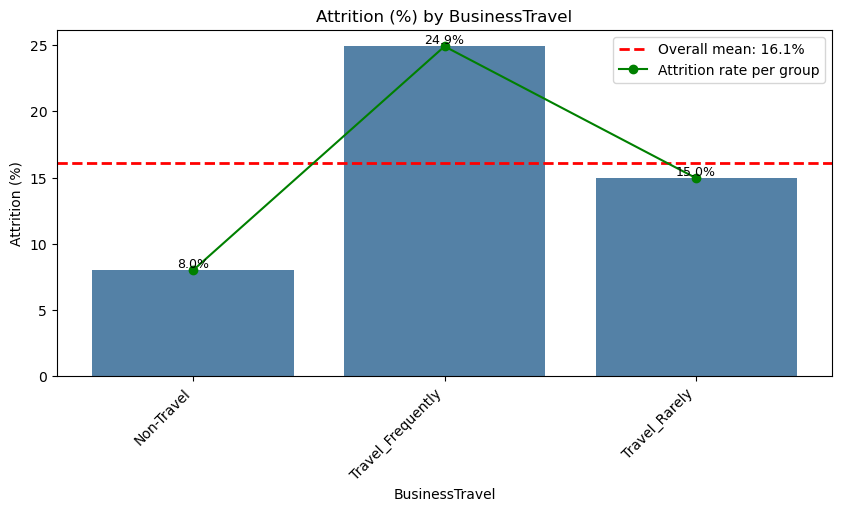

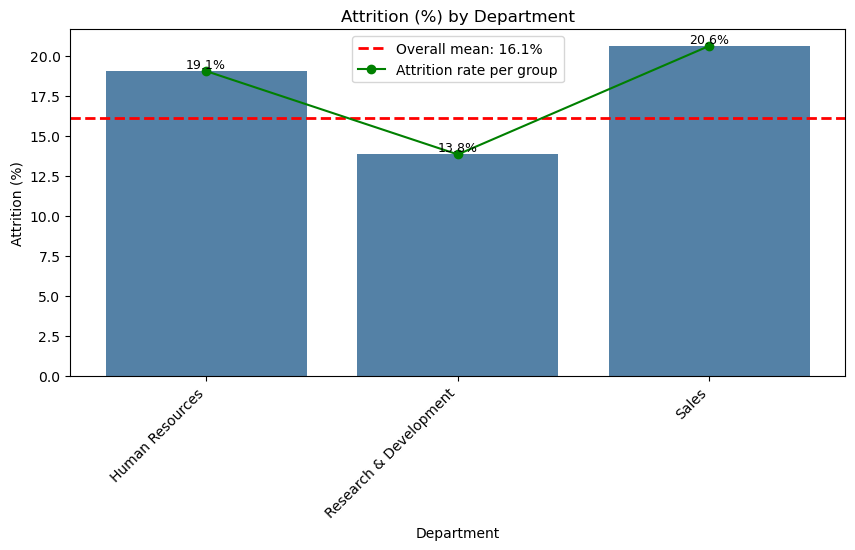

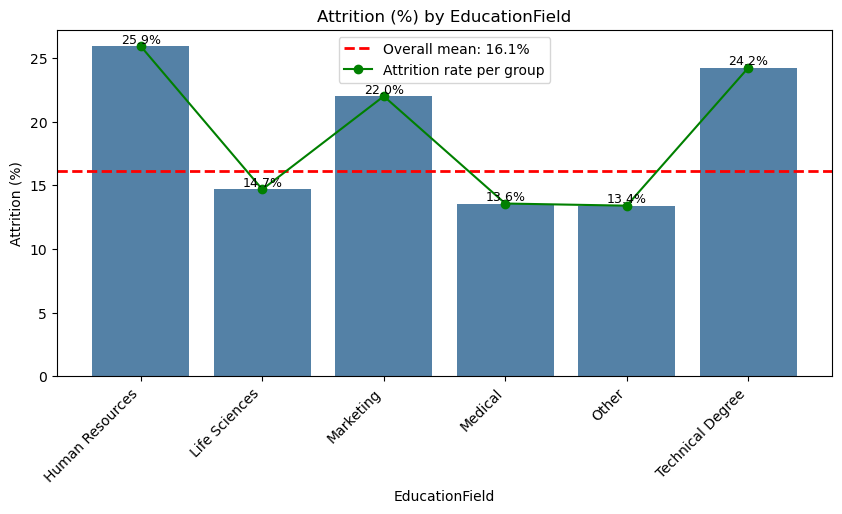

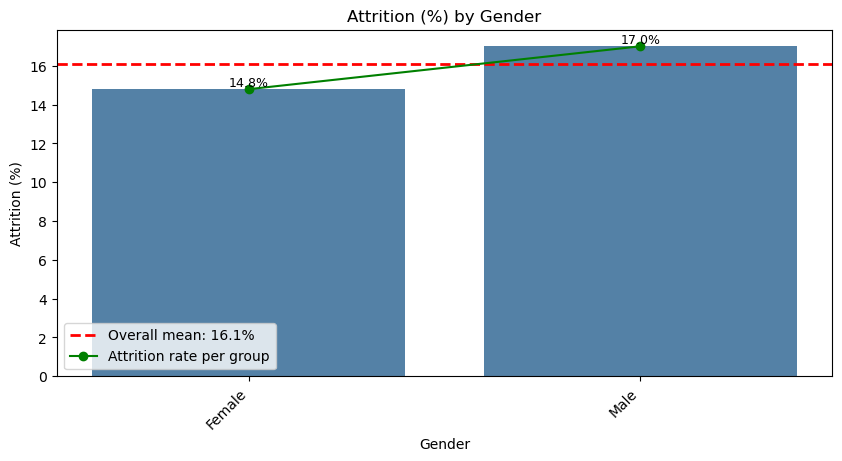

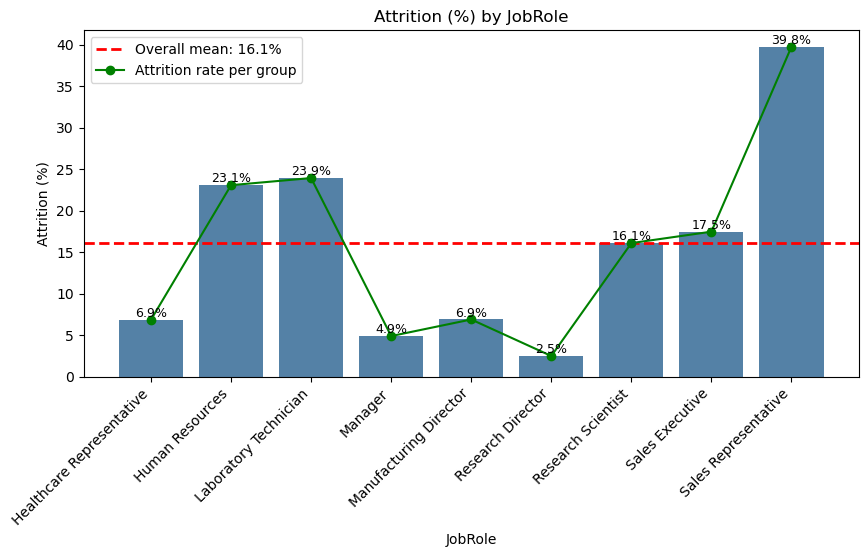

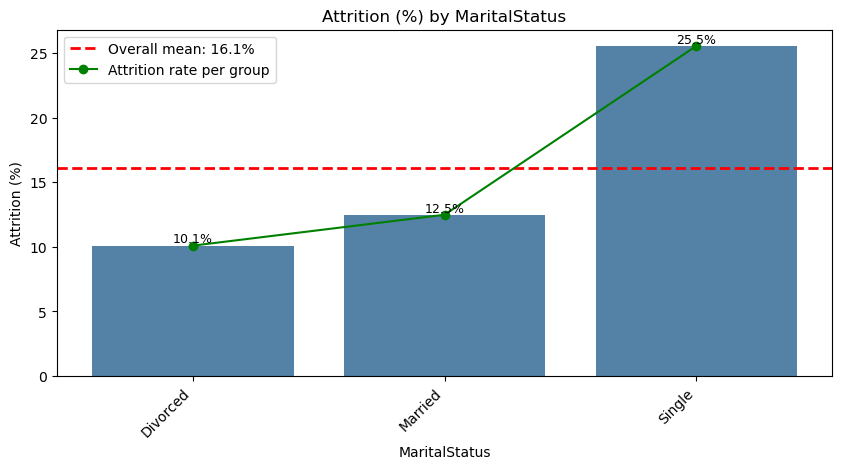

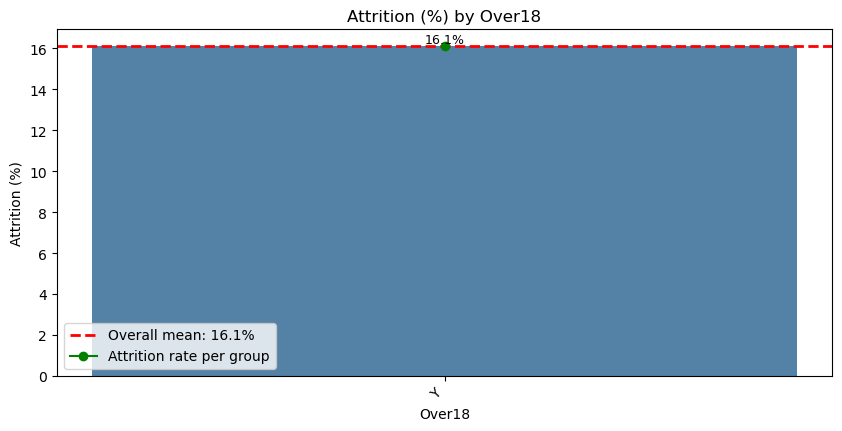

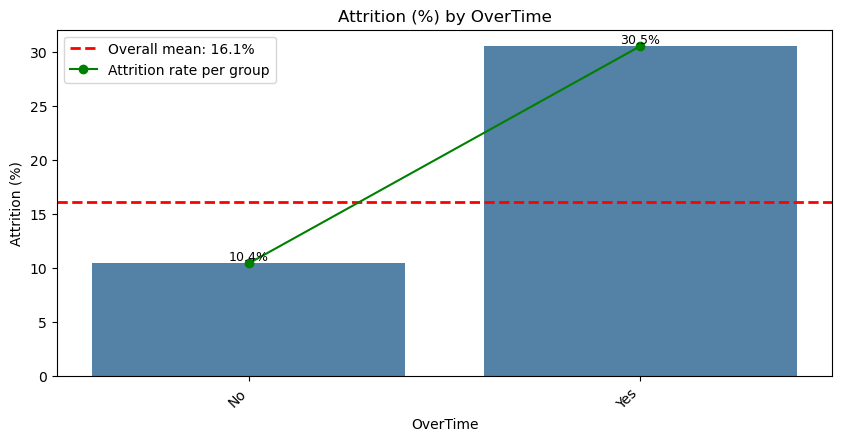

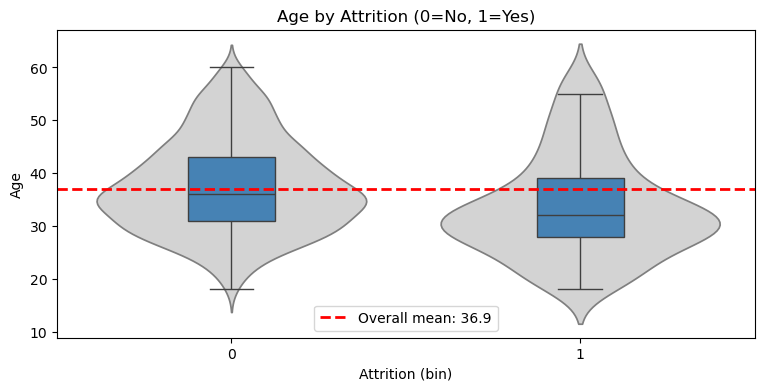

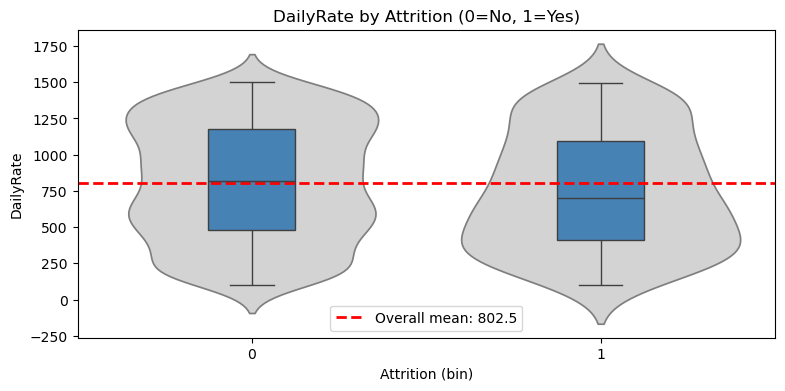

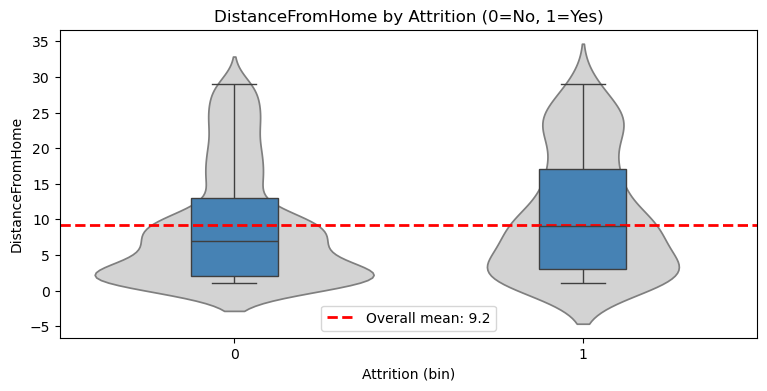

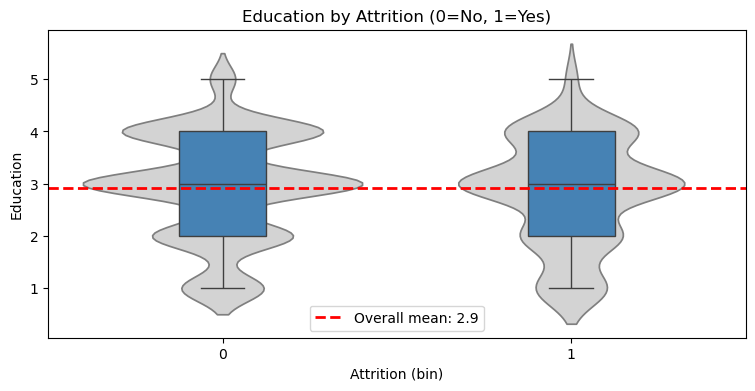

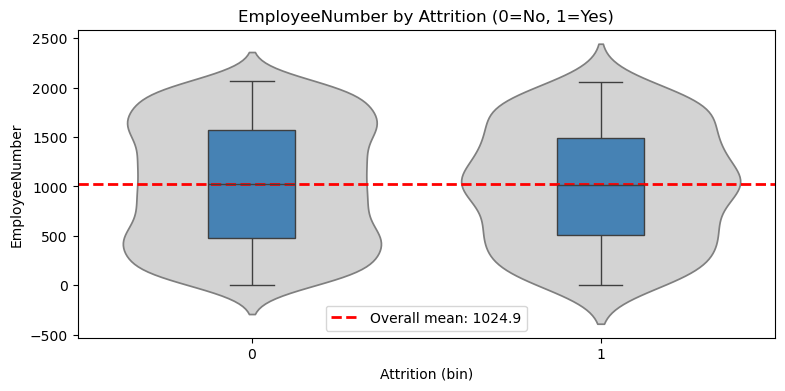

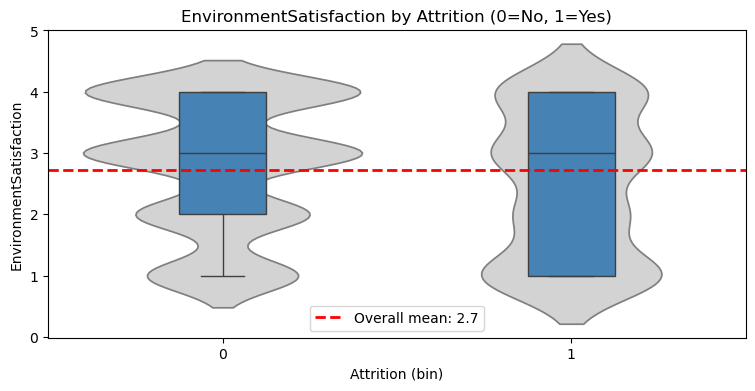

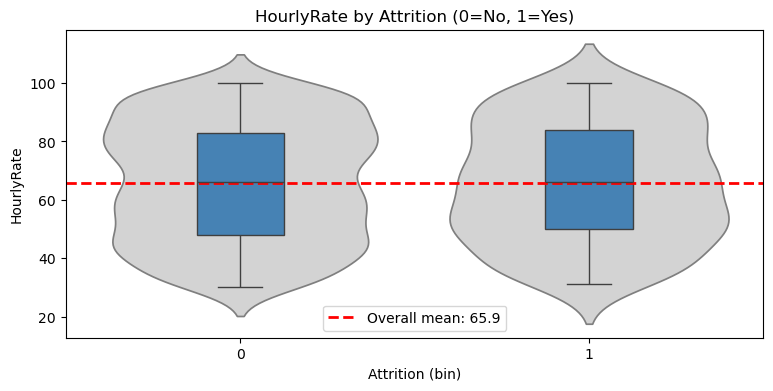

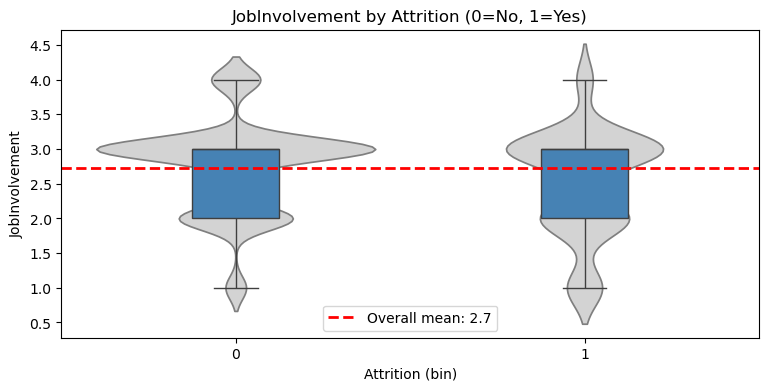

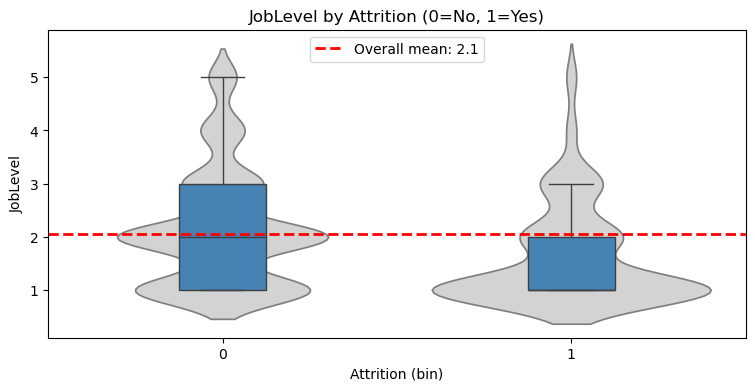

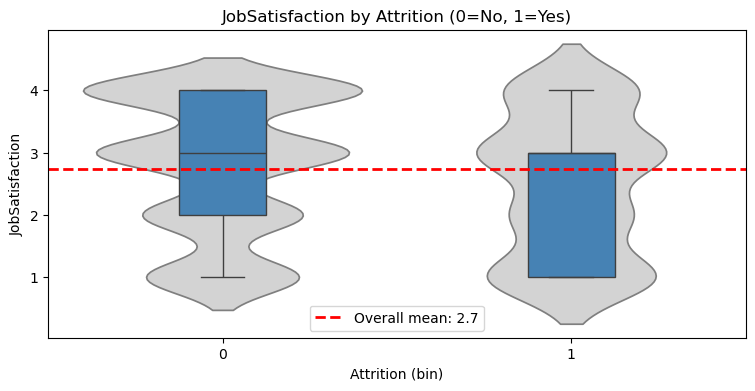

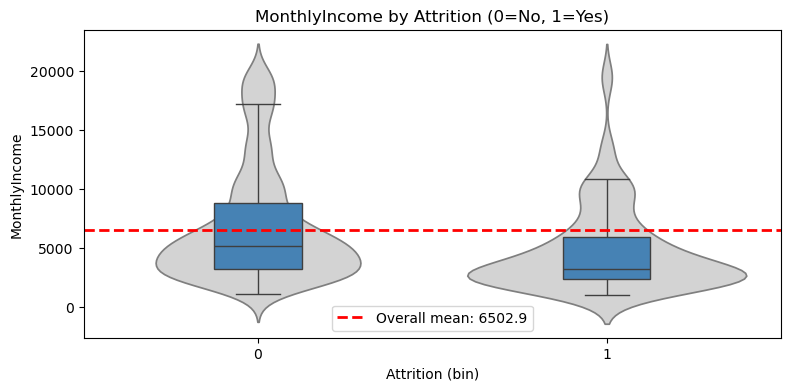

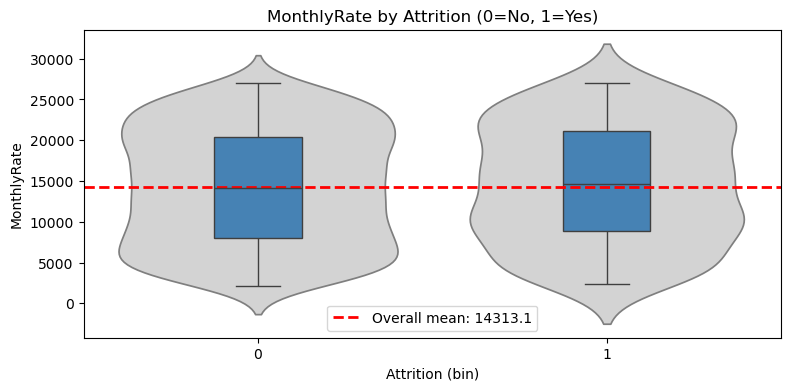

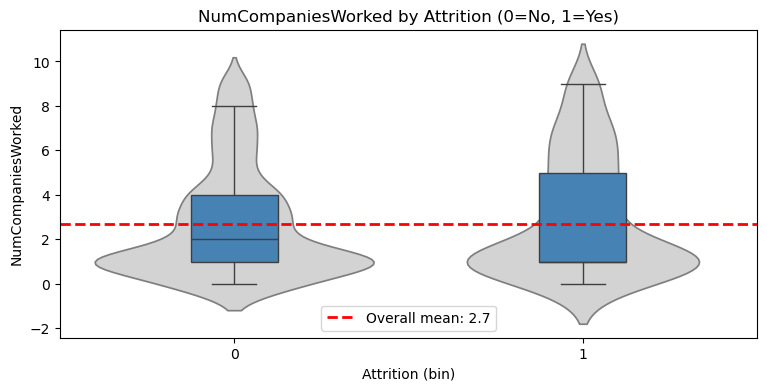

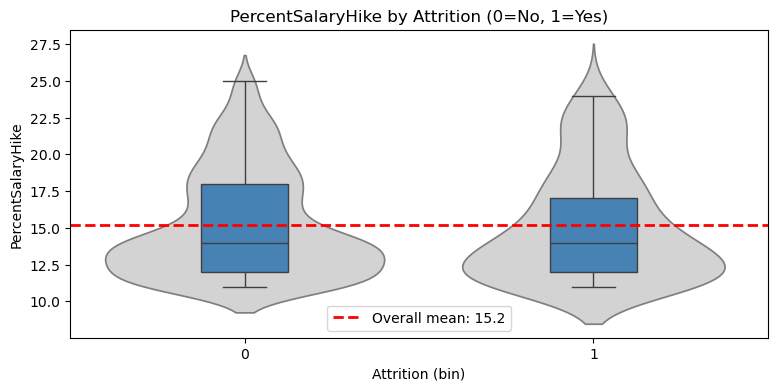

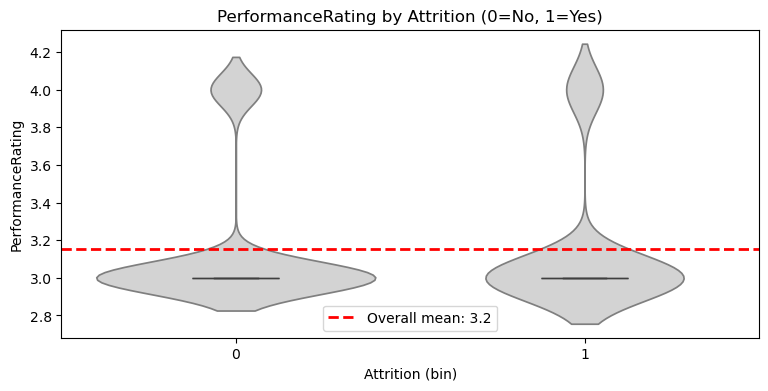

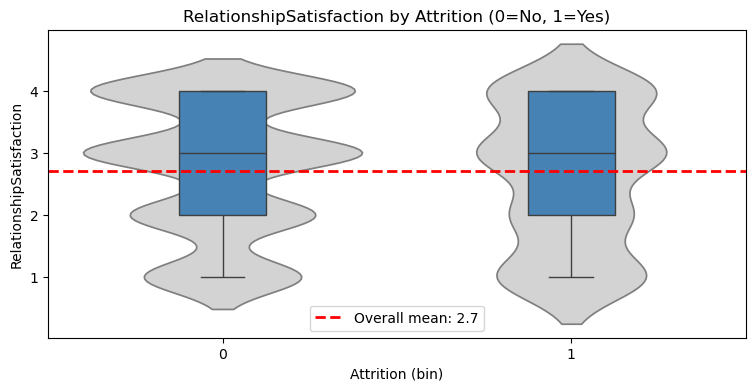

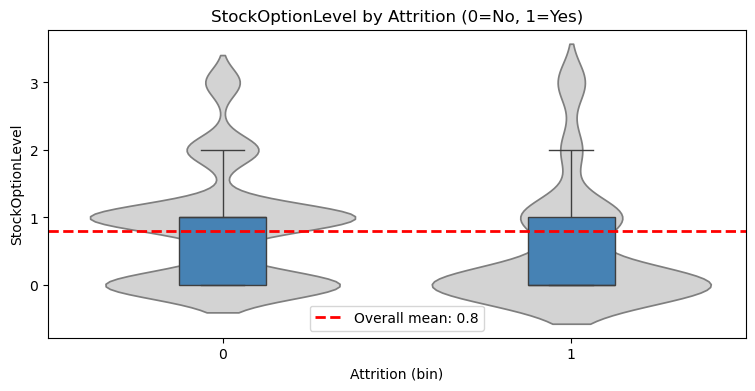

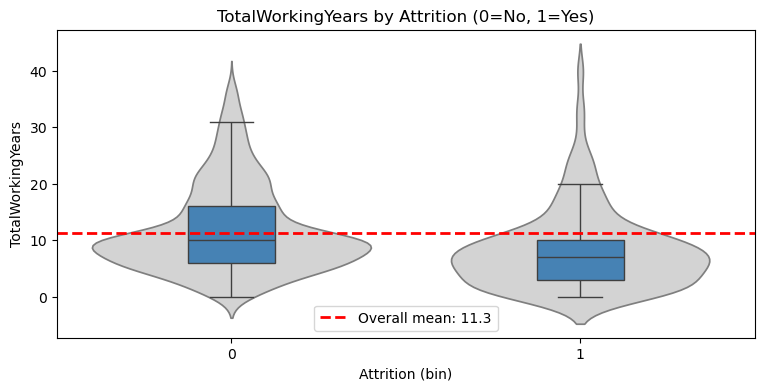

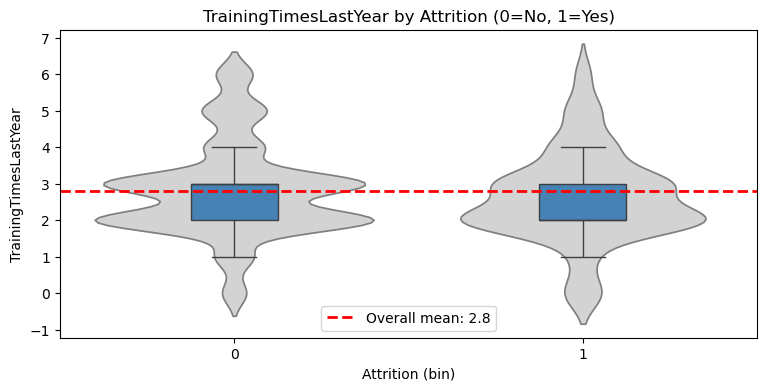

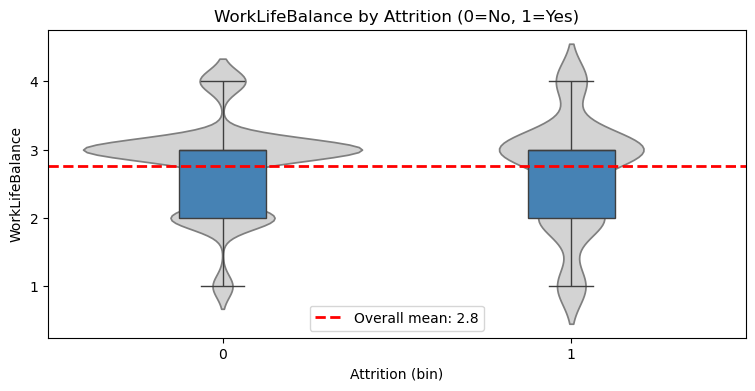

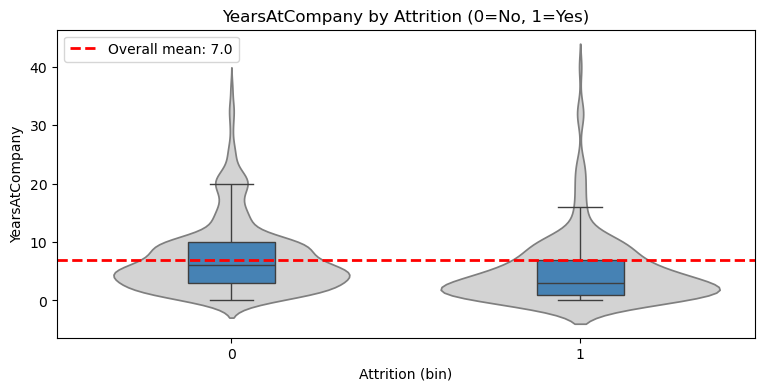

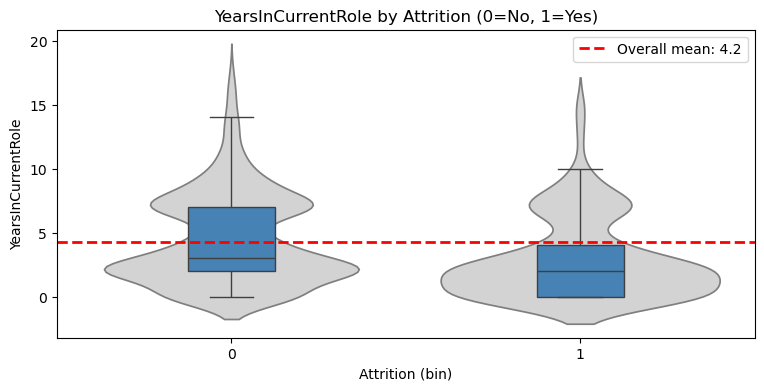

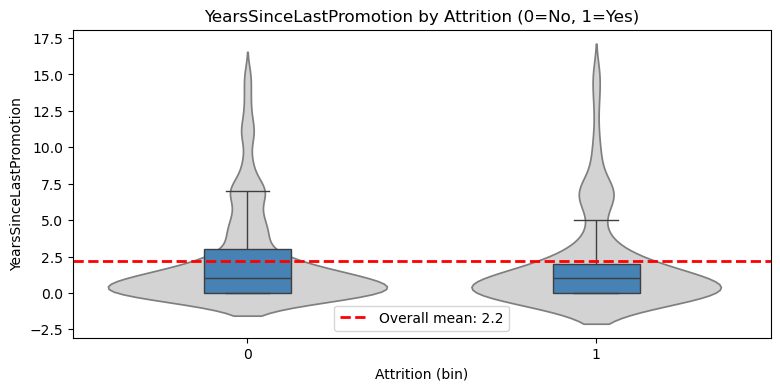

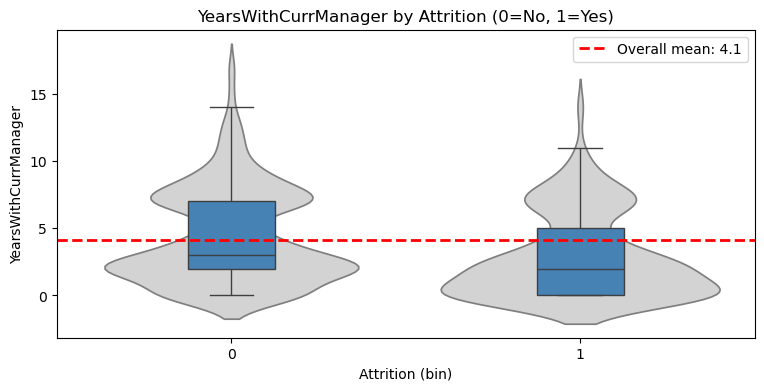

In [15]:
# ============================================
# BIVARIATE EDA — Attrition (lines = overall mean + per-group line)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define target
target = "Attrition"

# Create binary column for attrition
df["_Attrition_bin"] = df[target].str.strip().str.lower().map(
    {"yes": 1, "sim": 1, "true": 1, "1": 1,
     "no": 0, "nao": 0, "não": 0, "false": 0, "0": 0}
)

# Overall attrition mean (%)
overall_mean = df["_Attrition_bin"].mean() * 100

# 1. Target distribution (no mean line)
tgt_vc = df[target].value_counts(dropna=False)
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=tgt_vc.index, y=tgt_vc.values, color="steelblue", ax=ax)
ax.set_title("Attrition Distribution")
ax.set_xlabel("Attrition")
ax.set_ylabel("Count")
plt.show()

# 2. Categorical variables vs Attrition (with mean line + per-group line)
cat_cols = [c for c in df.columns if df[c].dtype == "object" and c not in [target]]

for col in cat_cols:
    tmp = df[[col, "_Attrition_bin"]].dropna()
    grp = tmp.groupby(col)["_Attrition_bin"].agg(["mean", "count"]).reset_index()
    grp["attrition_pct"] = (grp["mean"] * 100).round(2)

    fig, ax = plt.subplots(figsize=(10, 4.5))
    sns.barplot(data=grp, x=col, y="attrition_pct", color="steelblue", ax=ax)
    ax.set_title(f"Attrition (%) by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Attrition (%)")

    # Overall mean line
    ax.axhline(overall_mean, color="red", linestyle="--", linewidth=2,
               label=f"Overall mean: {overall_mean:.1f}%")

    # Per-group attrition line
    ax.plot(range(len(grp)), grp["attrition_pct"], color="green", linestyle="-", marker="o",
            label="Attrition rate per group")

    ax.legend()

    # Labels on bars
    for p, v in zip(ax.patches, grp["attrition_pct"]):
        ax.annotate(f"{v:.1f}%",
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha="center", va="bottom", fontsize=9)

    plt.xticks(rotation=45, ha="right")
    plt.show()

# 3. Numerical variables vs Attrition (with mean line)
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != "_Attrition_bin"]

for col in num_cols:
    if df[col].dropna().nunique() < 2:
        continue
    fig, ax = plt.subplots(figsize=(9, 4))
    sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, color="lightgray", ax=ax)
    sns.boxplot(data=df, x="_Attrition_bin", y=col, width=0.25,
                showcaps=True, boxprops={"facecolor": "steelblue"},
                showfliers=False, ax=ax)

    # Overall mean line of the variable
    overall_mean_num = df[col].mean()
    ax.axhline(overall_mean_num, color="red", linestyle="--", linewidth=2,
               label=f"Overall mean: {overall_mean_num:.1f}")

    ax.legend()
    ax.set_title(f"{col} by Attrition (0=No, 1=Yes)")
    ax.set_xlabel("Attrition (bin)")
    ax.set_ylabel(col)
    plt.show()

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4117459783.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


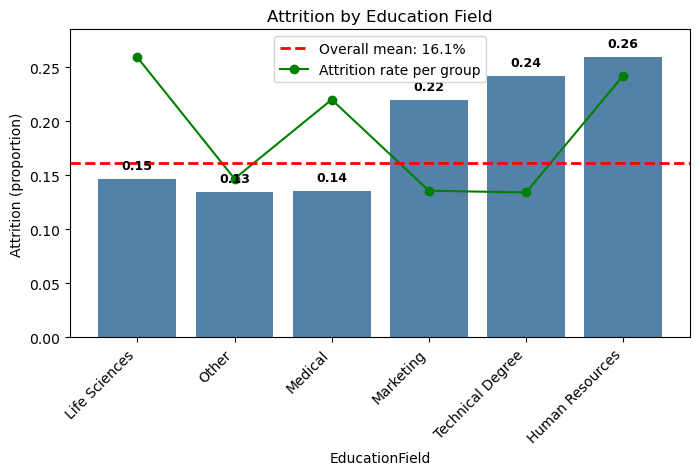

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4117459783.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


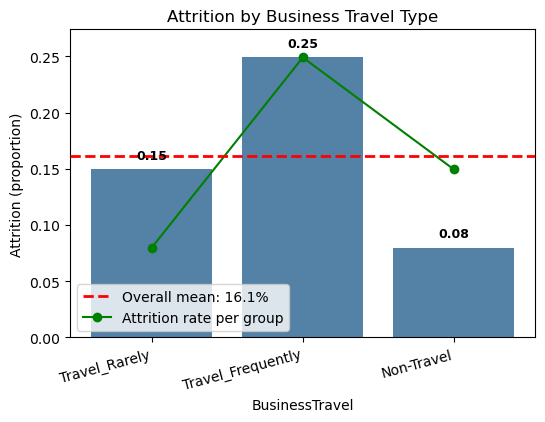

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4117459783.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


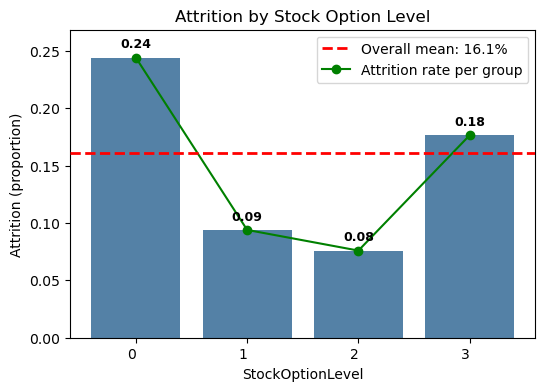

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4117459783.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


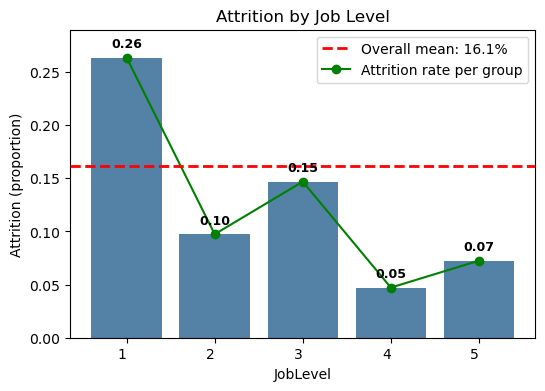

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4117459783.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


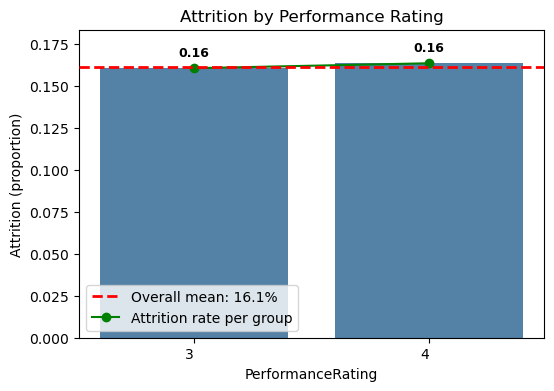

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4117459783.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


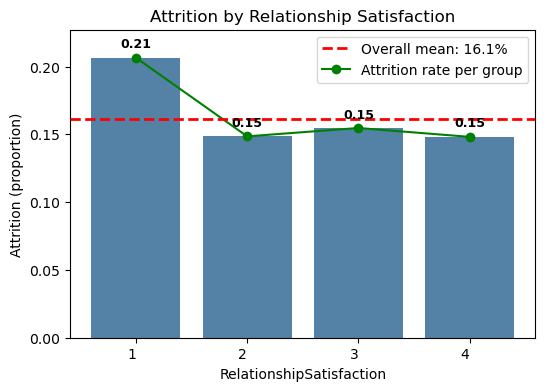

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4117459783.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


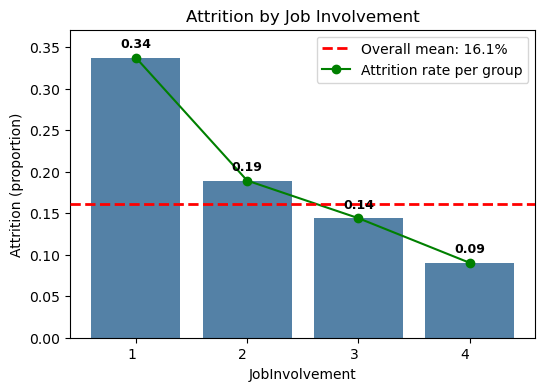

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4117459783.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


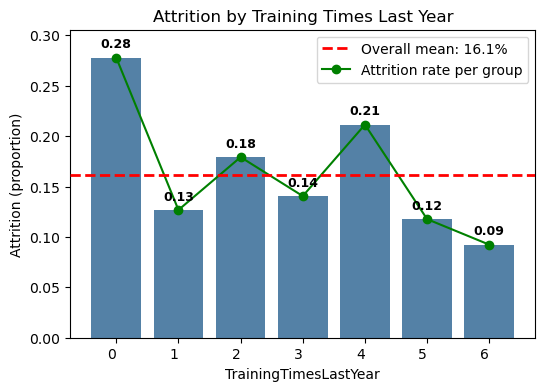

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4117459783.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


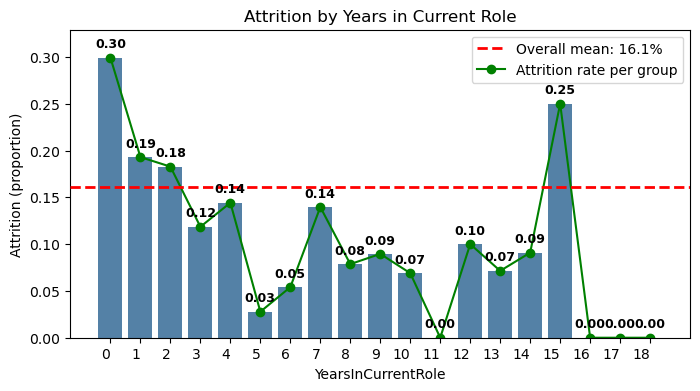

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\4117459783.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


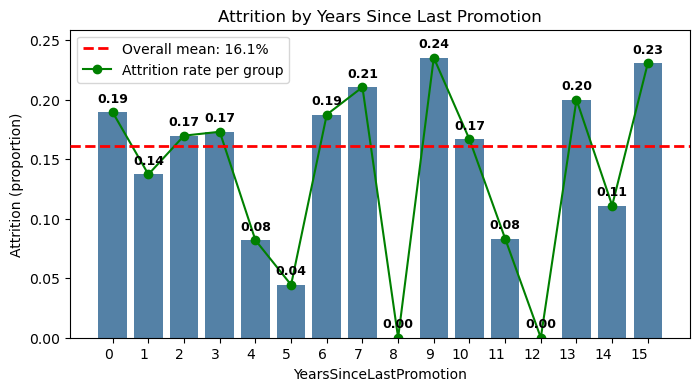

In [16]:
# ============================================
# 10 More Synthetic Attrition Plots (corrected mean line + per-group line)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

# overall mean in proportion (0 to 1)
overall_mean_prop = df["_Attrition_bin"].mean()

def plot_bar_with_mean(col, title, figsize=(8,4), rotation=0):
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Attrition (proportion)")

    # calculate top of bars for margin
    max_h = max((p.get_height() for p in ax.patches), default=0)
    pad = max(0.02, 0.1 * max_h)

    # include the greater of (top of bars, mean) in the limit
    upper = max(max_h, overall_mean_prop) + pad
    ax.set_ylim(0, upper)

    # overall mean line
    ax.axhline(overall_mean_prop, color="red", linestyle="--", linewidth=2,
               label=f"Overall mean: {overall_mean_prop*100:.1f}%", zorder=3)

    # per-group attrition line
    grp = df.groupby(col)["_Attrition_bin"].mean()
    ax.plot(range(len(grp)), grp.values, color="green", linestyle="-", marker="o",
            label="Attrition rate per group")

    ax.legend()

    # labels on bars
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, h + (pad*0.25),
                f"{h:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

    plt.xticks(rotation=rotation, ha="right")
    plt.show()

# 1. EducationField
plot_bar_with_mean("EducationField", "Attrition by Education Field", figsize=(8,4), rotation=45)

# 2. BusinessTravel
plot_bar_with_mean("BusinessTravel", "Attrition by Business Travel Type", figsize=(6,4), rotation=15)

# 3. StockOptionLevel
plot_bar_with_mean("StockOptionLevel", "Attrition by Stock Option Level", figsize=(6,4))

# 4. JobLevel
plot_bar_with_mean("JobLevel", "Attrition by Job Level", figsize=(6,4))

# 5. PerformanceRating
plot_bar_with_mean("PerformanceRating", "Attrition by Performance Rating", figsize=(6,4))

# 6. RelationshipSatisfaction
plot_bar_with_mean("RelationshipSatisfaction", "Attrition by Relationship Satisfaction", figsize=(6,4))

# 7. JobInvolvement
plot_bar_with_mean("JobInvolvement", "Attrition by Job Involvement", figsize=(6,4))

# 8. TrainingTimesLastYear
plot_bar_with_mean("TrainingTimesLastYear", "Attrition by Training Times Last Year", figsize=(6,4))

# 9. YearsInCurrentRole
plot_bar_with_mean("YearsInCurrentRole", "Attrition by Years in Current Role", figsize=(8,4), rotation=0)

# 10. YearsSinceLastPromotion
plot_bar_with_mean("YearsSinceLastPromotion", "Attrition by Years Since Last Promotion", figsize=(8,4), rotation=0)

In [3]:
# ============================================
# BIVARIATE EDA — Attrition (lines = overall mean, except first plot)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Define target
target = "Attrition"

# Ensure output directory exists
output_dir = "data/clean/eda/bivariate/figures"
os.makedirs(output_dir, exist_ok=True)

# Create binary column for attrition
df["_Attrition_bin"] = df[target].str.strip().str.lower().map(
    {"yes": 1, "sim": 1, "true": 1, "1": 1,
     "no": 0, "nao": 0, "não": 0, "false": 0, "0": 0}
)

# Overall attrition mean (%)
overall_mean = df["_Attrition_bin"].mean() * 100

# 1. Target distribution (no mean line)
tgt_vc = df[target].value_counts(dropna=False)
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=tgt_vc.index, y=tgt_vc.values, color="steelblue", ax=ax)
ax.set_title("Attrition Distribution")
ax.set_xlabel("Attrition")
ax.set_ylabel("Count")

# Save figure
plt.savefig(os.path.join(output_dir, "attrition_distribution.png"), bbox_inches="tight")
plt.close(fig)

# 2. Categorical variables vs Attrition (with mean line)
cat_cols = [c for c in df.columns if df[c].dtype == "object" and c not in [target]]

for col in cat_cols:
    tmp = df[[col, "_Attrition_bin"]].dropna()
    grp = tmp.groupby(col)["_Attrition_bin"].agg(["mean", "count"]).reset_index()
    grp["attrition_pct"] = (grp["mean"] * 100).round(2)

    fig, ax = plt.subplots(figsize=(10, 4.5))
    sns.barplot(data=grp, x=col, y="attrition_pct", color="steelblue", ax=ax)
    ax.set_title(f"Attrition (%) by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Attrition (%)")

    # Overall mean line
    ax.axhline(overall_mean, color="red", linestyle="--", linewidth=2,
               label=f"Overall mean: {overall_mean:.1f}%")
    ax.legend()

    # Labels on bars
    for p, v in zip(ax.patches, grp["attrition_pct"]):
        ax.annotate(f"{v:.1f}%",
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha="center", va="bottom", fontsize=9)

    plt.xticks(rotation=45, ha="right")

    # Save figure
    safe_name = f"attrition_by_{col}".replace(" ", "_").lower()
    plt.savefig(os.path.join(output_dir, f"{safe_name}.png"), bbox_inches="tight")
    plt.close(fig)

# 3. Numerical variables vs Attrition (with mean line)
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != "_Attrition_bin"]

for col in num_cols:
    if df[col].dropna().nunique() < 2:
        continue
    fig, ax = plt.subplots(figsize=(9, 4))
    sns.violinplot(data=df, x="_Attrition_bin", y=col, inner=None, color="lightgray", ax=ax)
    sns.boxplot(data=df, x="_Attrition_bin", y=col, width=0.25,
                showcaps=True, boxprops={"facecolor": "steelblue"},
                showfliers=False, ax=ax)

    # Overall mean line of the variable
    overall_mean_num = df[col].mean()
    ax.axhline(overall_mean_num, color="red", linestyle="--", linewidth=2,
               label=f"Overall mean: {overall_mean_num:.1f}")
    ax.legend()

    ax.set_title(f"{col} by Attrition (0=No, 1=Yes)")
    ax.set_xlabel("Attrition (bin)")
    ax.set_ylabel(col)

    # Save figure
    safe_name = f"{col}_by_attrition".replace(" ", "_").lower()
    plt.savefig(os.path.join(output_dir, f"{safe_name}.png"), bbox_inches="tight")
    plt.close(fig)

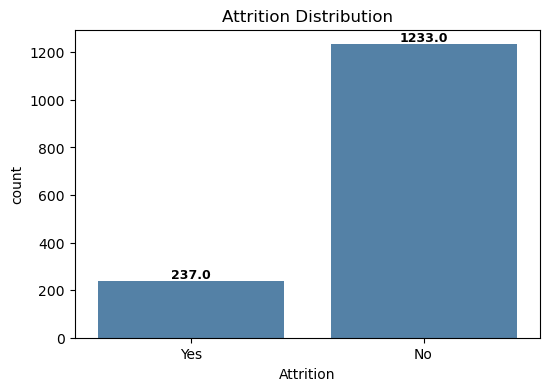

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\3906256188.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Department", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


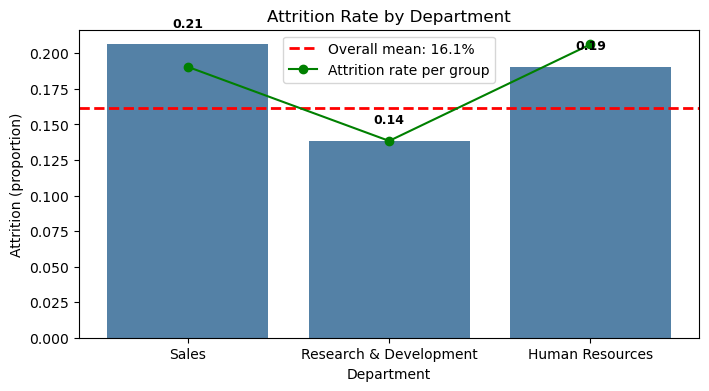

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\3906256188.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Gender", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


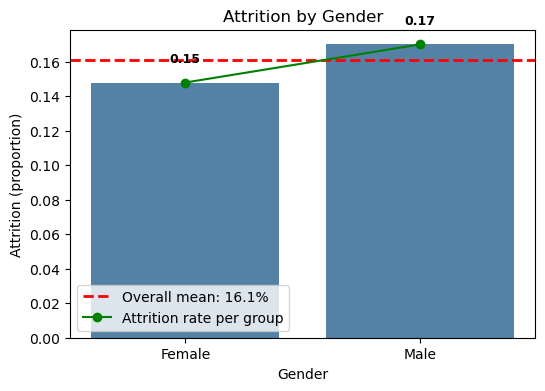

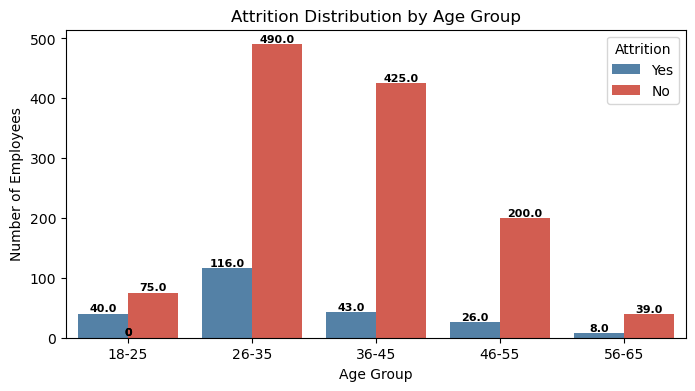

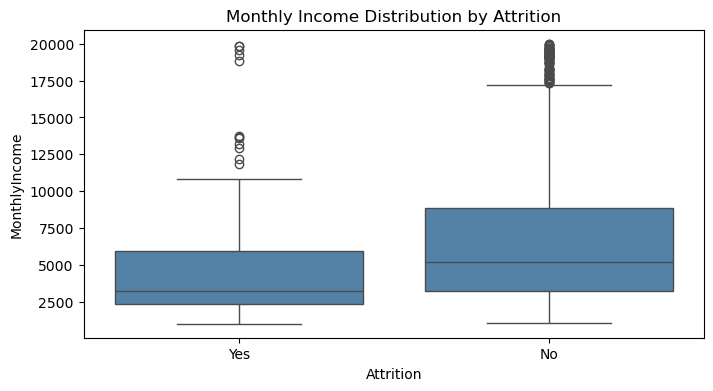

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\3906256188.py:99: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="JobRole", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


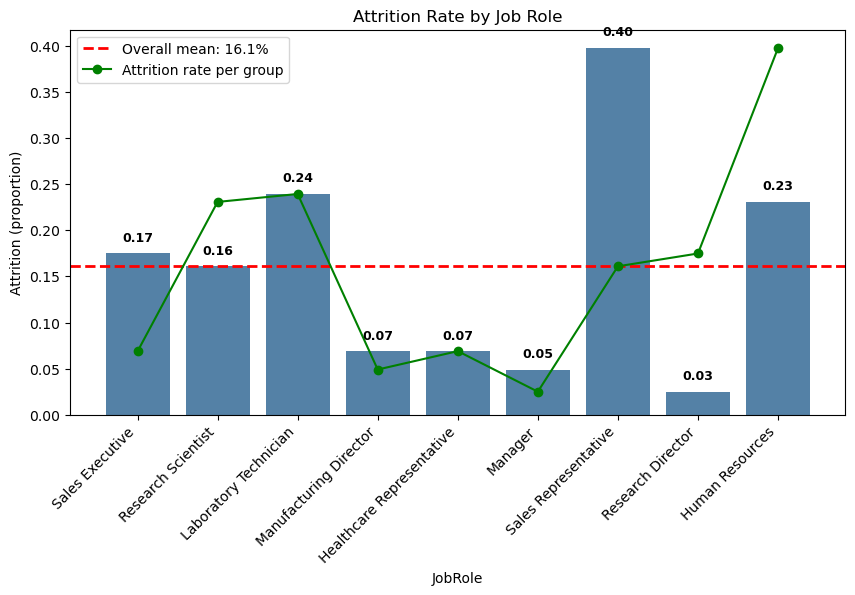

In [17]:
# ============================================
# Attrition-focused Plots (overall mean + per-group line)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create binary column for attrition
df["_Attrition_bin"] = df["Attrition"].str.strip().str.lower().map(
    {"yes": 1, "sim": 1, "true": 1, "1": 1,
     "no": 0, "nao": 0, "não": 0, "false": 0, "0": 0}
)

# Overall mean (proportion)
overall_mean = df["_Attrition_bin"].mean()

# 1. Target distribution (no mean line)
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Attrition", data=df, color="steelblue", ax=ax)
ax.set_title("Attrition Distribution")

for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value}", ha="center", va="bottom", fontsize=9, fontweight="bold")
plt.show()

# 2. Attrition by Department
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x="Department", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
ax.set_title("Attrition Rate by Department")
ax.set_ylabel("Attrition (proportion)")

# Overall mean line
ax.axhline(overall_mean, color="red", linestyle="--", linewidth=2,
           label=f"Overall mean: {overall_mean*100:.1f}%")

# Per-group line
grp = df.groupby("Department")["_Attrition_bin"].mean()
ax.plot(range(len(grp)), grp.values, color="green", linestyle="-", marker="o",
        label="Attrition rate per group")

ax.legend()

for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")
plt.show()

# 3. Attrition by Gender
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x="Gender", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
ax.set_title("Attrition by Gender")
ax.set_ylabel("Attrition (proportion)")

ax.axhline(overall_mean, color="red", linestyle="--", linewidth=2,
           label=f"Overall mean: {overall_mean*100:.1f}%")

grp = df.groupby("Gender")["_Attrition_bin"].mean()
ax.plot(range(len(grp)), grp.values, color="green", linestyle="-", marker="o",
        label="Attrition rate per group")

ax.legend()

for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")
plt.show()

# 4. Attrition Distribution by Age Group (side-by-side bars)
df["AgeGroup"] = pd.cut(df["Age"], bins=[18,25,35,45,55,65],
                        labels=["18-25","26-35","36-45","46-55","56-65"])

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x="AgeGroup", hue="Attrition", data=df,
              palette=["steelblue","#e74c3c"], ax=ax)

ax.set_title("Attrition Distribution by Age Group")
ax.set_ylabel("Number of Employees")
ax.set_xlabel("Age Group")

for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value}", ha="center", va="bottom", fontsize=8, fontweight="bold")
plt.show()

# 5. Income vs Attrition (boxplot)
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, color="steelblue", ax=ax)
ax.set_title("Monthly Income Distribution by Attrition")
plt.show()

# 6. Attrition by Job Role
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x="JobRole", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
ax.set_title("Attrition Rate by Job Role")
ax.set_ylabel("Attrition (proportion)")
plt.xticks(rotation=45, ha="right")

ax.axhline(overall_mean, color="red", linestyle="--", linewidth=2,
           label=f"Overall mean: {overall_mean*100:.1f}%")

grp = df.groupby("JobRole")["_Attrition_bin"].mean()
ax.plot(range(len(grp)), grp.values, color="green", linestyle="-", marker="o",
        label="Attrition rate per group")

ax.legend()

for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")
plt.show()

In [4]:
# ============================================
# Attrition-focused Plots (same color, no error bars, with labels)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output directory exists
output_dir = "data/clean/eda/bivariate/figures"
os.makedirs(output_dir, exist_ok=True)

# Create binary column for attrition
df["_Attrition_bin"] = df["Attrition"].str.strip().str.lower().map(
    {"yes": 1, "sim": 1, "true": 1, "1": 1,
     "no": 0, "nao": 0, "não": 0, "false": 0, "0": 0}
)

# 1. Target distribution
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Attrition", data=df, color="steelblue", ax=ax)
ax.set_title("Attrition Distribution")

for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.savefig(os.path.join(output_dir, "attrition_distribution.png"), bbox_inches="tight")
plt.close(fig)

# 2. Attrition by Department
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x="Department", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
ax.set_title("Attrition Rate by Department")
ax.set_ylabel("Attrition (%)")

for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.savefig(os.path.join(output_dir, "attrition_by_department.png"), bbox_inches="tight")
plt.close(fig)

# 3. Attrition by Gender
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x="Gender", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
ax.set_title("Attrition by Gender")
ax.set_ylabel("Attrition (%)")

for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.savefig(os.path.join(output_dir, "attrition_by_gender.png"), bbox_inches="tight")
plt.close(fig)

# 4. Attrition Distribution by Age Group
df["AgeGroup"] = pd.cut(df["Age"], bins=[18,25,35,45,55,65],
                        labels=["18-25","26-35","36-45","46-55","56-65"])

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x="AgeGroup", hue="Attrition", data=df,
              palette=["steelblue","#e74c3c"], ax=ax)

ax.set_title("Attrition Distribution by Age Group")
ax.set_ylabel("Number of Employees")
ax.set_xlabel("Age Group")

for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value}", ha="center", va="bottom", fontsize=8, fontweight="bold")

plt.savefig(os.path.join(output_dir, "attrition_by_agegroup.png"), bbox_inches="tight")
plt.close(fig)

# 5. Income vs Attrition (boxplot)
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, color="steelblue", ax=ax)
ax.set_title("Monthly Income Distribution by Attrition")

plt.savefig(os.path.join(output_dir, "income_vs_attrition.png"), bbox_inches="tight")
plt.close(fig)

# 6. Attrition by Job Role
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x="JobRole", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
ax.set_title("Attrition Rate by Job Role")
ax.set_ylabel("Attrition (%)")
plt.xticks(rotation=45, ha="right")

for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.savefig(os.path.join(output_dir, "attrition_by_jobrole.png"), bbox_inches="tight")
plt.close(fig)

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\3118460035.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Department", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\3118460035.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Gender", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\3118460035.py:90: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="JobRole", y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)


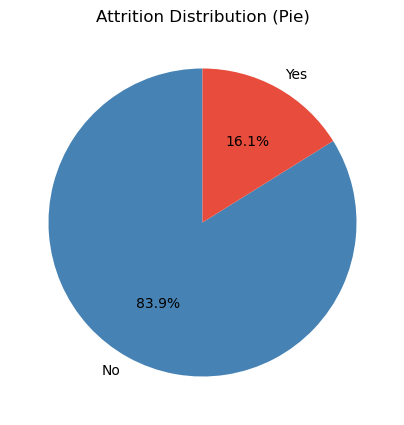

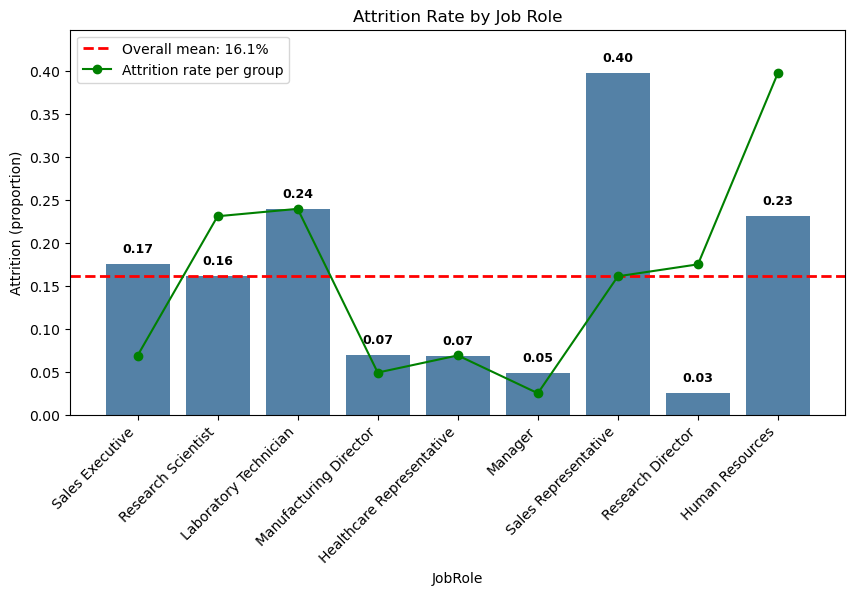

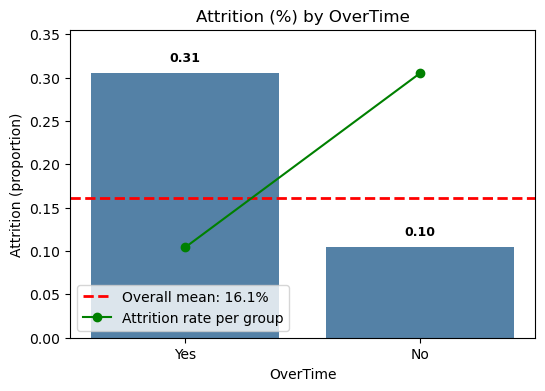

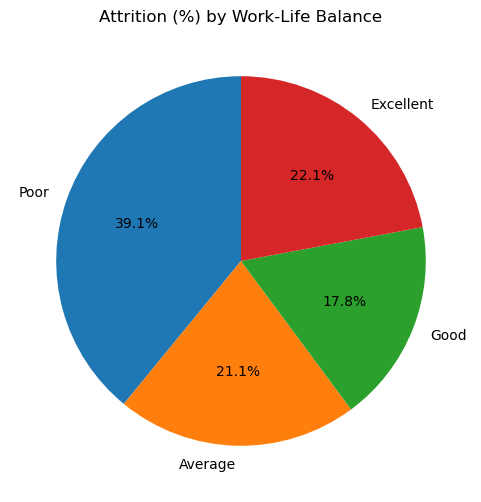

In [18]:
# ============================================
# Synthetic Attrition Plots (standardized colors + overall mean + per-group line)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Palettes
pizza_yesno_colors = ["steelblue", "#e74c3c"]   # blue + red
pizza_wlb_colors   = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # 4 distinct colors

# Overall mean (proportion)
overall_mean = df["_Attrition_bin"].mean()

# 1. Attrition Pie (Yes vs No) — blue + red
fig, ax = plt.subplots(figsize=(5,5))
df["Attrition"].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90, colors=pizza_yesno_colors, ax=ax
)
ax.set_ylabel("")
ax.set_title("Attrition Distribution (Pie)")
plt.show()

# 2. Bars — Attrition by Job Role (steelblue)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x="JobRole", y="_Attrition_bin", data=df,
            color="steelblue", errorbar=None, ax=ax)
ax.set_title("Attrition Rate by Job Role")
ax.set_ylabel("Attrition (proportion)")
plt.xticks(rotation=45, ha="right")

# Overall mean line
ax.axhline(overall_mean, color="red", linestyle="--", linewidth=2,
           label=f"Overall mean: {overall_mean*100:.1f}%")

# Per-group line
grp = df.groupby("JobRole")["_Attrition_bin"].mean()
ax.plot(range(len(grp)), grp.values, color="green", linestyle="-", marker="o",
        label="Attrition rate per group")

ax.legend()

max_h = max(p.get_height() for p in ax.patches) if ax.patches else 0
pad = max(0.05, 0.1 * max_h)
ax.set_ylim(0, max(max_h, overall_mean) + pad)

for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, h + (pad * 0.2),
            f"{h:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")
plt.show()

# 3. Bars — Attrition by OverTime (steelblue)
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x="OverTime", y="_Attrition_bin", data=df,
            color="steelblue", errorbar=None, ax=ax)
ax.set_title("Attrition (%) by OverTime")
ax.set_ylabel("Attrition (proportion)")

ax.axhline(overall_mean, color="red", linestyle="--", linewidth=2,
           label=f"Overall mean: {overall_mean*100:.1f}%")

grp = df.groupby("OverTime")["_Attrition_bin"].mean()
ax.plot(range(len(grp)), grp.values, color="green", linestyle="-", marker="o",
        label="Attrition rate per group")

ax.legend()

max_h = max(p.get_height() for p in ax.patches) if ax.patches else 0
pad = max(0.05, 0.1 * max_h)
ax.set_ylim(0, max(max_h, overall_mean) + pad)

for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, h + (pad * 0.2),
            f"{h:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")
plt.show()

# 4. Attrition Pie by Work-Life Balance (4 distinct colors)
wlb_labels = {1: "Poor", 2: "Average", 3: "Good", 4: "Excellent"}
wlb_series = df.groupby("WorkLifeBalance")["_Attrition_bin"].mean()
wlb_series.index = wlb_series.index.map(wlb_labels)

fig, ax = plt.subplots(figsize=(6,6))
wlb_series.plot.pie(
    autopct="%1.1f%%", startangle=90, colors=pizza_wlb_colors, ax=ax
)
ax.set_ylabel("")
ax.set_title("Attrition (%) by Work-Life Balance")
plt.show()

In [5]:
# ============================================
# Synthetic Attrition Plots (standardized colors)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output directory exists
output_dir = "data/clean/eda/bivariate/figures"
os.makedirs(output_dir, exist_ok=True)

# Palettes
pizza_yesno_colors = ["steelblue", "#e74c3c"]   # blue + red
pizza_wlb_colors   = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # 4 distinct colors

# 1. Attrition Pie (Yes vs No) — blue + red
fig, ax = plt.subplots(figsize=(5,5))
df["Attrition"].value_counts().plot.pie(
    autopct="%1.1f%%", startangle=90, colors=pizza_yesno_colors, ax=ax
)
ax.set_ylabel("")
ax.set_title("Attrition Distribution (Pie)")

plt.savefig(os.path.join(output_dir, "attrition_distribution_pie.png"), bbox_inches="tight")
plt.close(fig)

# 2. Bars — Attrition by Job Role (steelblue)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x="JobRole", y="_Attrition_bin", data=df,
            color="steelblue", errorbar=None, ax=ax)
ax.set_title("Attrition Rate by Job Role")
ax.set_ylabel("Attrition (%)")
plt.xticks(rotation=45, ha="right")

max_h = max(p.get_height() for p in ax.patches) if ax.patches else 0
pad = max(0.05, 0.1 * max_h)
ax.set_ylim(0, max_h + pad)
for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, h + (pad * 0.2),
            f"{h:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.savefig(os.path.join(output_dir, "attrition_by_jobrole.png"), bbox_inches="tight")
plt.close(fig)

# 3. Bars — Attrition by OverTime (steelblue)
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(x="OverTime", y="_Attrition_bin", data=df,
            color="steelblue", errorbar=None, ax=ax)
ax.set_title("Attrition (%) by OverTime")
ax.set_ylabel("Attrition (%)")

max_h = max(p.get_height() for p in ax.patches) if ax.patches else 0
pad = max(0.05, 0.1 * max_h)
ax.set_ylim(0, max_h + pad)
for p in ax.patches:
    h = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, h + (pad * 0.2),
            f"{h:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.savefig(os.path.join(output_dir, "attrition_by_overtime.png"), bbox_inches="tight")
plt.close(fig)

# 4. Attrition Pie by Work-Life Balance (4 distinct colors)
wlb_labels = {1: "Poor", 2: "Average", 3: "Good", 4: "Excellent"}
wlb_series = df.groupby("WorkLifeBalance")["_Attrition_bin"].mean()
wlb_series.index = wlb_series.index.map(wlb_labels)

fig, ax = plt.subplots(figsize=(6,6))
wlb_series.plot.pie(
    autopct="%1.1f%%", startangle=90, colors=pizza_wlb_colors, ax=ax
)
ax.set_ylabel("")
ax.set_title("Attrition (%) by Work-Life Balance")

plt.savefig(os.path.join(output_dir, "attrition_by_worklifebalance.png"), bbox_inches="tight")
plt.close(fig)

In [6]:
# ============================================
# 10 More Synthetic Attrition Plots (corrected mean line, saved to path)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output directory exists
output_dir = "data/clean/eda/bivariate/figures"
os.makedirs(output_dir, exist_ok=True)

# overall mean in proportion (0 to 1)
overall_mean_prop = df["_Attrition_bin"].mean()

def plot_bar_with_mean(col, title, figsize=(8,4), rotation=0):
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Attrition (proportion)")

    # calculate top of bars for margin
    max_h = max((p.get_height() for p in ax.patches), default=0)
    pad = max(0.02, 0.1 * max_h)

    # include the greater of (top of bars, mean) in the limit
    upper = max(max_h, overall_mean_prop) + pad
    ax.set_ylim(0, upper)

    # mean line (in proportion)
    ax.axhline(overall_mean_prop, color="red", linestyle="--", linewidth=2,
               label=f"Overall mean: {overall_mean_prop*100:.1f}%", zorder=3)
    ax.legend()

    # labels on bars
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, h + (pad*0.25),
                f"{h:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

    plt.xticks(rotation=rotation, ha="right")

    # Save figure with safe filename
    safe_name = title.replace(" ", "_").replace("/", "_").lower()
    filepath = os.path.join(output_dir, f"{safe_name}.png")
    plt.savefig(filepath, bbox_inches="tight")
    plt.close(fig)

# Generate and save plots
plot_bar_with_mean("EducationField", "Attrition by Education Field", figsize=(8,4), rotation=45)
plot_bar_with_mean("BusinessTravel", "Attrition by Business Travel Type", figsize=(6,4), rotation=15)
plot_bar_with_mean("StockOptionLevel", "Attrition by Stock Option Level", figsize=(6,4))
plot_bar_with_mean("JobLevel", "Attrition by Job Level", figsize=(6,4))
plot_bar_with_mean("PerformanceRating", "Attrition by Performance Rating", figsize=(6,4))
plot_bar_with_mean("RelationshipSatisfaction", "Attrition by Relationship Satisfaction", figsize=(6,4))
plot_bar_with_mean("JobInvolvement", "Attrition by Job Involvement", figsize=(6,4))
plot_bar_with_mean("TrainingTimesLastYear", "Attrition by Training Times Last Year", figsize=(6,4))
plot_bar_with_mean("YearsInCurrentRole", "Attrition by Years in Current Role", figsize=(8,4), rotation=0)
plot_bar_with_mean("YearsSinceLastPromotion", "Attrition by Years Since Last Promotion", figsize=(8,4), rotation=0)

C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\97587389.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\97587389.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\97587389.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\97587389.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y="_Attrition_bin", data=df, color="steelblue", ci=None, ax=ax)
C:\Users\mathe\AppData\L

# SPEARMAN

In [36]:
# ============================================
# MULTIVARIATE EDA — Spearman Only (Simplified, with One-Hot)
# ============================================

import pandas as pd
import numpy as np

# Garantir coluna binária para Attrition
if '_Attrition_bin' not in df.columns and 'Attrition' in df.columns:
    y_raw = df['Attrition'].astype(str).str.strip().str.lower()
    df['_Attrition_bin'] = np.where(y_raw.isin(['yes','1','true','sim']), 1,
                             np.where(y_raw.isin(['no','0','false','nao','não']), 0, np.nan))

# One-hot encoding das categóricas
cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c not in ['Attrition']]
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Lista de variáveis numéricas (inclui dummies)
num_for_corr = [c for c in df_encoded.select_dtypes(include=[np.number]).columns]

# Correlação Spearman
corr = df_encoded[num_for_corr].corr(method='spearman')

print("\nSpearman correlation matrix:")
print(corr.round(3))

# Top 10 correlações absolutas com Attrition
if '_Attrition_bin' in corr.columns:
    tgt_corr = corr['_Attrition_bin'].drop(index='_Attrition_bin', errors='ignore')
    top10 = tgt_corr.abs().sort_values(ascending=False).head(10)
    print("\nTop 10 absolute Spearman correlations with Attrition:")
    print(top10)


Spearman correlation matrix:
                            Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000      0.007            -0.019      0.205   
DailyRate                 0.007      1.000            -0.003     -0.014   
DistanceFromHome         -0.019     -0.003             1.000      0.016   
Education                 0.205     -0.014             0.016      1.000   
EmployeeCount               NaN        NaN               NaN        NaN   
EmployeeNumber           -0.002     -0.052             0.039      0.043   
EnvironmentSatisfaction   0.010      0.019            -0.010     -0.028   
HourlyRate                0.029      0.024             0.020      0.014   
JobInvolvement            0.034      0.042             0.034      0.037   
JobLevel                  0.490      0.004             0.022      0.107   
JobSatisfaction          -0.005      0.028            -0.013     -0.005   
MonthlyIncome             0.472      0.016             0.003      0.12

Top 10 variables most correlated with Attrition:
TotalWorkingYears       0.199002
MonthlyIncome           0.198305
YearsAtCompany          0.190419
JobLevel                0.190370
YearsInCurrentRole      0.180623
YearsWithCurrManager    0.175355
StockOptionLevel        0.172296
Age                     0.171214
JobInvolvement          0.119496
JobSatisfaction         0.102948
Name: _Attrition_bin, dtype: float64


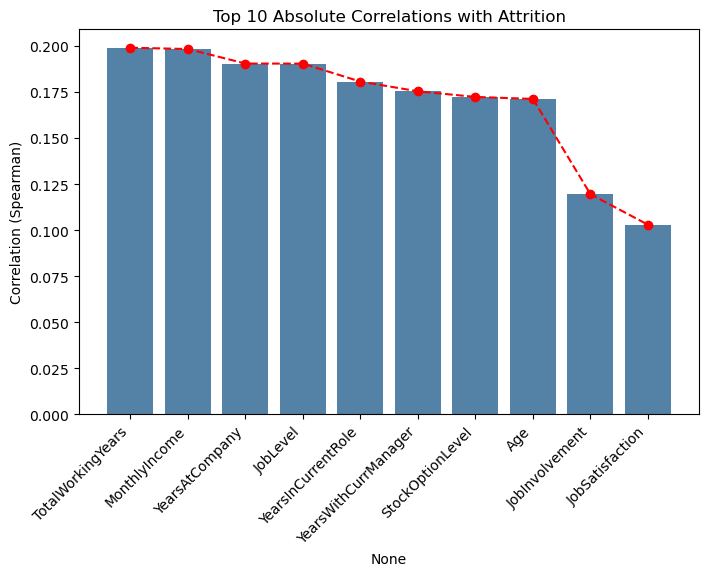

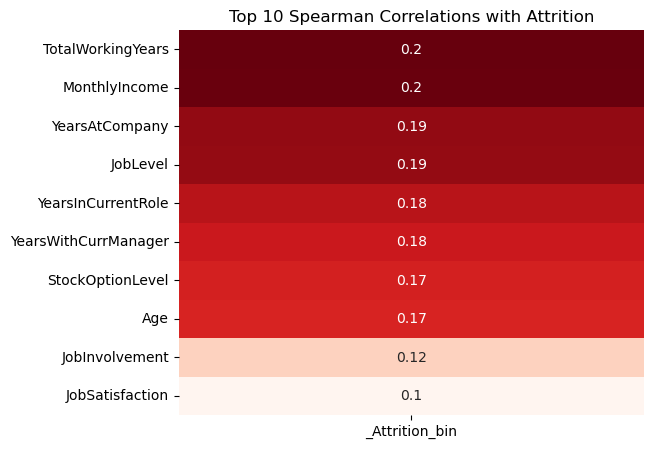

In [7]:
# ============================================
# Simple Spearman + Top 10 Attrition Plots
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure binary column for Attrition
if '_Attrition_bin' not in df.columns and 'Attrition' in df.columns:
    y_raw = df['Attrition'].astype(str).str.strip().str.lower()
    df['_Attrition_bin'] = np.where(y_raw.isin(['yes','1','true','sim']), 1,
                             np.where(y_raw.isin(['no','0','false','nao','não']), 0, np.nan))

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Select only numeric columns
num_cols = df_encoded.select_dtypes(include=[np.number])

# Spearman correlation
corr = num_cols.corr(method="spearman")

# Top 10 variables most correlated with Attrition
tgt_corr = corr["_Attrition_bin"].drop("_Attrition_bin").abs().sort_values(ascending=False).head(10)
top10_vars = tgt_corr.index.tolist()

print("Top 10 variables most correlated with Attrition:")
print(tgt_corr)

# Bar + line of correlations
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=tgt_corr.index, y=tgt_corr.values, color="steelblue", ax=ax)
x_coords = [p.get_x() + p.get_width()/2 for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.plot(x_coords, y_coords, color="red", linestyle="--", marker="o")
ax.set_title("Top 10 Absolute Correlations with Attrition")
ax.set_ylabel("Correlation (Spearman)")
plt.xticks(rotation=45, ha="right")
plt.show()

# 7. Heatmap of correlation with Attrition
corr = df.select_dtypes(include=[np.number]).corr(method="spearman")
tgt_corr = corr["_Attrition_bin"].drop("_Attrition_bin").abs().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(tgt_corr.to_frame(), annot=True, cmap="Reds", cbar=False, ax=ax)
ax.set_title("Top 10 Spearman Correlations with Attrition")
plt.show()

In [7]:
# ============================================
# Simple Spearman + Top 10 Attrition Plots (saved to path)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Ensure output directory exists
output_dir = "data/clean/eda/bivariate/figures"
os.makedirs(output_dir, exist_ok=True)

# Ensure binary column for Attrition
if '_Attrition_bin' not in df.columns and 'Attrition' in df.columns:
    y_raw = df['Attrition'].astype(str).str.strip().str.lower()
    df['_Attrition_bin'] = np.where(y_raw.isin(['yes','1','true','sim']), 1,
                             np.where(y_raw.isin(['no','0','false','nao','não']), 0, np.nan))

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Select only numeric columns
num_cols = df_encoded.select_dtypes(include=[np.number])

# Spearman correlation
corr = num_cols.corr(method="spearman")

# Top 10 variables most correlated with Attrition
tgt_corr = corr["_Attrition_bin"].drop("_Attrition_bin").abs().sort_values(ascending=False).head(10)
top10_vars = tgt_corr.index.tolist()

print("Top 10 variables most correlated with Attrition:")
print(tgt_corr)

# Bar + line of correlations
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=tgt_corr.index, y=tgt_corr.values, color="steelblue", ax=ax)
x_coords = [p.get_x() + p.get_width()/2 for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.plot(x_coords, y_coords, color="red", linestyle="--", marker="o")
ax.set_title("Top 10 Absolute Correlations with Attrition")
ax.set_ylabel("Correlation (Spearman)")
plt.xticks(rotation=45, ha="right")

plt.savefig(os.path.join(output_dir, "top10_attrition_correlations_bar.png"), bbox_inches="tight")
plt.close(fig)

# Heatmap of correlation with Attrition
corr = df.select_dtypes(include=[np.number]).corr(method="spearman")
tgt_corr = corr["_Attrition_bin"].drop("_Attrition_bin").abs().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(tgt_corr.to_frame(), annot=True, cmap="Reds", cbar=False, ax=ax)
ax.set_title("Top 10 Spearman Correlations with Attrition")

plt.savefig(os.path.join(output_dir, "top10_attrition_correlations_heatmap.png"), bbox_inches="tight")
plt.close(fig)

Top 10 variables most correlated with Attrition:
TotalWorkingYears       0.199002
MonthlyIncome           0.198305
YearsAtCompany          0.190419
JobLevel                0.190370
YearsInCurrentRole      0.180623
YearsWithCurrManager    0.175355
StockOptionLevel        0.172296
Age                     0.171214
JobInvolvement          0.119496
JobSatisfaction         0.102948
Name: _Attrition_bin, dtype: float64


Top 10 variables most correlated with Attrition:
TotalWorkingYears       0.199002
MonthlyIncome           0.198305
YearsAtCompany          0.190419
JobLevel                0.190370
YearsInCurrentRole      0.180623
YearsWithCurrManager    0.175355
StockOptionLevel        0.172296
Age                     0.171214
JobInvolvement          0.119496
JobSatisfaction         0.102948
Name: _Attrition_bin, dtype: float64


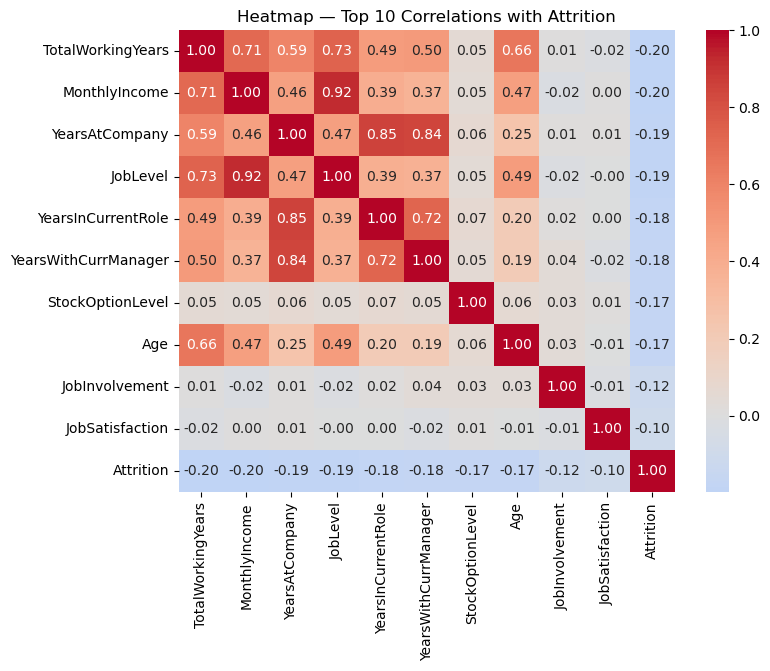

C:\Users\mathe\AppData\Local\Temp\ipykernel_24556\4005264378.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tgt_corr.index, y=tgt_corr.values, color="steelblue", ci=None, ax=ax)


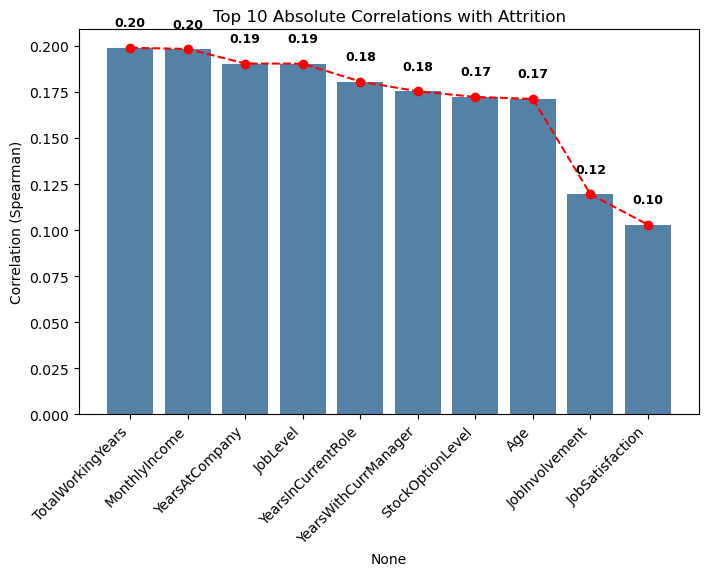

In [8]:
# ============================================
# Simple Spearman + Top 10 Attrition Plots (with adjusted labels)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure binary column for Attrition
if '_Attrition_bin' not in df.columns and 'Attrition' in df.columns:
    y_raw = df['Attrition'].astype(str).str.strip().str.lower()
    df['_Attrition_bin'] = np.where(y_raw.isin(['yes','1','true','sim']), 1,
                             np.where(y_raw.isin(['no','0','false','nao','não']), 0, np.nan))

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Select only numeric columns
num_cols = df_encoded.select_dtypes(include=[np.number])

# Spearman correlation
corr = num_cols.corr(method="spearman")

# Top 10 variables most correlated with Attrition
tgt_corr = corr["_Attrition_bin"].drop("_Attrition_bin").abs().sort_values(ascending=False).head(10)
top10_vars = tgt_corr.index.tolist()

print("Top 10 variables most correlated with Attrition:")
print(tgt_corr)

# Heatmap of Top 10 (renaming to "Attrition")
corr_renamed = corr.rename(columns={"_Attrition_bin": "Attrition"},
                           index={"_Attrition_bin": "Attrition"})

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_renamed.loc[top10_vars+["Attrition"], top10_vars+["Attrition"]],
    cmap="coolwarm", center=0, annot=True, fmt=".2f"
)
plt.title("Heatmap — Top 10 Correlations with Attrition")
plt.show()

# Bar + line of correlations (with labels on bars)
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=tgt_corr.index, y=tgt_corr.values, color="steelblue", ci=None, ax=ax)

# Coordinates for line connecting the tops
x_coords = [p.get_x() + p.get_width()/2 for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.plot(x_coords, y_coords, color="red", linestyle="--", marker="o")

# Add values on each bar
for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

ax.set_title("Top 10 Absolute Correlations with Attrition")
ax.set_ylabel("Correlation (Spearman)")
plt.xticks(rotation=45, ha="right")
plt.show()

In [8]:
# ============================================
# Simple Spearman + Top 10 Attrition Plots (with adjusted labels, saved to path)
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Ensure output directory exists
output_dir = "data/clean/eda/bivariate/figures"
os.makedirs(output_dir, exist_ok=True)

# Ensure binary column for Attrition
if '_Attrition_bin' not in df.columns and 'Attrition' in df.columns:
    y_raw = df['Attrition'].astype(str).str.strip().str.lower()
    df['_Attrition_bin'] = np.where(y_raw.isin(['yes','1','true','sim']), 1,
                             np.where(y_raw.isin(['no','0','false','nao','não']), 0, np.nan))

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Select only numeric columns
num_cols = df_encoded.select_dtypes(include=[np.number])

# Spearman correlation
corr = num_cols.corr(method="spearman")

# Top 10 variables most correlated with Attrition
tgt_corr = corr["_Attrition_bin"].drop("_Attrition_bin").abs().sort_values(ascending=False).head(10)
top10_vars = tgt_corr.index.tolist()

print("Top 10 variables most correlated with Attrition:")
print(tgt_corr)

# Heatmap of Top 10 (renaming to "Attrition")
corr_renamed = corr.rename(columns={"_Attrition_bin": "Attrition"},
                           index={"_Attrition_bin": "Attrition"})

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(
    corr_renamed.loc[top10_vars+["Attrition"], top10_vars+["Attrition"]],
    cmap="coolwarm", center=0, annot=True, fmt=".2f", ax=ax
)
ax.set_title("Heatmap — Top 10 Correlations with Attrition")

plt.savefig(os.path.join(output_dir, "top10_attrition_correlations_heatmap.png"), bbox_inches="tight")
plt.close(fig)

# Bar + line of correlations (with labels on bars)
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=tgt_corr.index, y=tgt_corr.values, color="steelblue", ci=None, ax=ax)

# Coordinates for line connecting the tops
x_coords = [p.get_x() + p.get_width()/2 for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.plot(x_coords, y_coords, color="red", linestyle="--", marker="o")

# Add values on each bar
for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, value + 0.01,
            f"{value:.2f}", ha="center", va="bottom", fontsize=9, fontweight="bold")

ax.set_title("Top 10 Absolute Correlations with Attrition")
ax.set_ylabel("Correlation (Spearman)")
plt.xticks(rotation=45, ha="right")

plt.savefig(os.path.join(output_dir, "top10_attrition_correlations_bar.png"), bbox_inches="tight")
plt.close(fig)

Top 10 variables most correlated with Attrition:
TotalWorkingYears       0.199002
MonthlyIncome           0.198305
YearsAtCompany          0.190419
JobLevel                0.190370
YearsInCurrentRole      0.180623
YearsWithCurrManager    0.175355
StockOptionLevel        0.172296
Age                     0.171214
JobInvolvement          0.119496
JobSatisfaction         0.102948
Name: _Attrition_bin, dtype: float64


C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\128266475.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=tgt_corr.index, y=tgt_corr.values, color="steelblue", ci=None, ax=ax)


# MODELS


   Fold  Accuracy        F1
0     1  0.840136  0.203390
1     2  0.853741  0.317460
2     3  0.860544  0.226415
3     4  0.863946  0.259259
4     5  0.857143  0.275862


C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\364482137.py:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=metrics, y=values, color="steelblue", ci=None, ax=ax)


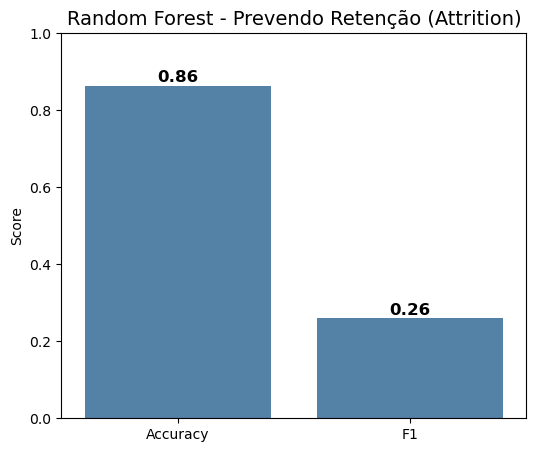

Model saved to: notebooks/models\random_forest_attrition.pkl


In [9]:
# ============================================
# Random Forest - Prevendo Retenção (Attrition)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib   # for saving the model

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Preparar dados (X = features, y = target binário)
y = df["_Attrition_bin"]
X = df.drop(columns=["Attrition", "_Attrition_bin"])
X = pd.get_dummies(X, drop_first=True)  # transformar categóricas em dummies

# Configuração do modelo
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)
    
    results.append({"Fold": fold, "Accuracy": acc, "F1": f1})

# Consolidar resultados
results_df = pd.DataFrame(results)
print(results_df)

# Melhor fold
best_fold_acc = results_df.loc[results_df["Accuracy"].idxmax()]
best_fold_f1  = results_df.loc[results_df["F1"].idxmax()]

# Plot comparativo — barras únicas
fig, ax = plt.subplots(figsize=(6,5))
metrics = ["Accuracy", "F1"]
values = [best_fold_acc["Accuracy"], best_fold_acc["F1"]]

sns.barplot(x=metrics, y=values, color="steelblue", ci=None, ax=ax)

for i, v in enumerate(values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=12, fontweight="bold")

ax.set_ylim(0,1)
ax.set_title("Random Forest - Prevendo Retenção (Attrition)", fontsize=14)
ax.set_ylabel("Score")
plt.show()

# ============================================
# Save trained model to notebooks/models
# ============================================

# Ensure directory exists
model_dir = "notebooks/models"
os.makedirs(model_dir, exist_ok=True)

# Save model
model_path = os.path.join(model_dir, "random_forest_attrition.pkl")
joblib.dump(rf, model_path)

print(f"Model saved to: {model_path}")

c:\Users\mathe\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mathe\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

   Fold  Accuracy        F1
0     1  0.826531  0.281690
1     2  0.843537  0.178571
2     3  0.867347  0.360656
3     4  0.846939  0.262295
4     5  0.870748  0.387097


c:\Users\mathe\anaconda3\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mathe\AppData\Local\Temp\ipykernel_32128\3867004813.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=metrics, y=values, color="steelblue", ci=None, ax=ax)


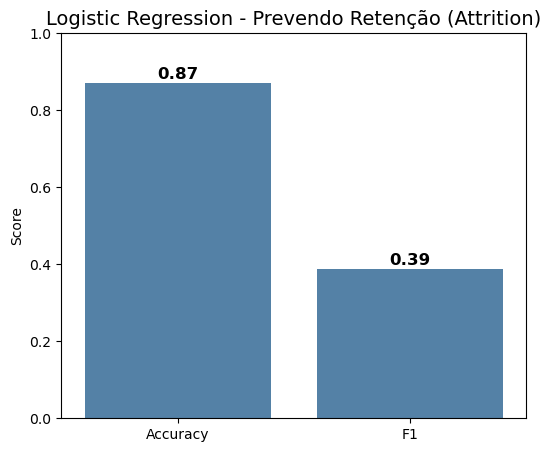

In [33]:
# ============================================
# Logistic Regression - Prevendo Retenção (Attrition)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Preparar dados
y = df["_Attrition_bin"]
X = df.drop(columns=["Attrition", "_Attrition_bin"])
X = pd.get_dummies(X, drop_first=True)

# Modelo
logreg = LogisticRegression(max_iter=1000, solver="lbfgs")

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)
    
    results.append({"Fold": fold, "Accuracy": acc, "F1": f1})

results_df = pd.DataFrame(results)
print(results_df)

# Melhor fold
best_fold_acc = results_df.loc[results_df["Accuracy"].idxmax()]
best_fold_f1  = results_df.loc[results_df["F1"].idxmax()]

# Plot
fig, ax = plt.subplots(figsize=(6,5))
metrics = ["Accuracy", "F1"]
values = [best_fold_acc["Accuracy"], best_fold_acc["F1"]]

sns.barplot(x=metrics, y=values, color="steelblue", ci=None, ax=ax)
for i, v in enumerate(values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=12, fontweight="bold")

ax.set_ylim(0,1)
ax.set_title("Logistic Regression - Prevendo Retenção (Attrition)", fontsize=14)
ax.set_ylabel("Score")
plt.show()

   Fold  Accuracy        F1
0     1  0.836735  0.294118
1     2  0.853741  0.394366
2     3  0.887755  0.492308
3     4  0.874150  0.412698
4     5  0.860544  0.453333


C:\Users\mathe\AppData\Local\Temp\ipykernel_29340\1845631688.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=metrics, y=values, color="steelblue", ci=None, ax=ax)


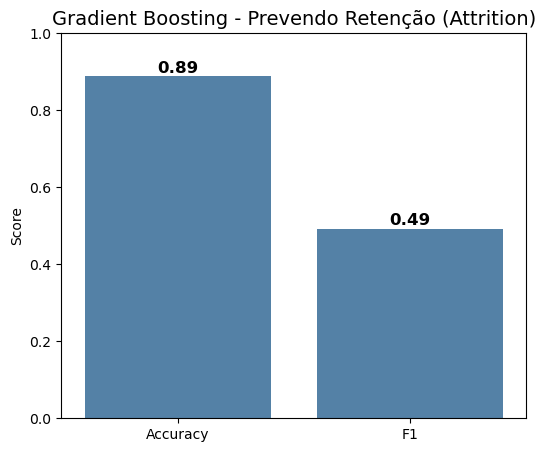

Model saved to: notebooks/models\gradient_boosting_attrition.pkl


In [12]:
# ============================================
# Gradient Boosting - Prevendo Retenção (Attrition)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib   # for saving the model

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score

# Preparar dados
y = df["_Attrition_bin"]
X = df.drop(columns=["Attrition", "_Attrition_bin"])
X = pd.get_dummies(X, drop_first=True)

# Modelo
gb = GradientBoostingClassifier(random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred)
    
    results.append({"Fold": fold, "Accuracy": acc, "F1": f1})

results_df = pd.DataFrame(results)
print(results_df)

# Melhor fold
best_fold_acc = results_df.loc[results_df["Accuracy"].idxmax()]
best_fold_f1  = results_df.loc[results_df["F1"].idxmax()]

# Plot
fig, ax = plt.subplots(figsize=(6,5))
metrics = ["Accuracy", "F1"]
values = [best_fold_acc["Accuracy"], best_fold_acc["F1"]]

sns.barplot(x=metrics, y=values, color="steelblue", ci=None, ax=ax)
for i, v in enumerate(values):
    ax.text(i, v + 0.01, f"{v:.2f}", ha="center", fontsize=12, fontweight="bold")

ax.set_ylim(0,1)
ax.set_title("Gradient Boosting - Prevendo Retenção (Attrition)", fontsize=14)
ax.set_ylabel("Score")
plt.show()

# ============================================
# Save trained model to notebooks/models
# ============================================

# Ensure directory exists
model_dir = "notebooks/models"
os.makedirs(model_dir, exist_ok=True)

# Save model
model_path = os.path.join(model_dir, "gradient_boosting_attrition.pkl")
joblib.dump(gb, model_path)

print(f"Model saved to: {model_path}")

Logistic Regression
- Accuracy: ranged between 0.82 and 0.87, showing reasonable performance in predicting the majority class (retention).
- F1‑Score: fluctuated between 0.17 and 0.38, with low values. This indicates difficulty in balancing precision and recall for the minority class (employees who leave).
- Summary: a simple model, good as a baseline, but not very effective at capturing more complex patterns of attrition.

Gradient Boosting
- Accuracy: ranged between 0.84 and 0.88, with the best fold reaching 0.88.
- F1‑Score: achieved higher values than logistic regression, between 0.34 and 0.49, with Fold 5 standing out (F1 = 0.49).
- Summary: a more robust model, able to maintain high accuracy while improving the ability to correctly identify attrition cases. Shows superior balance between retention and attrition.

Random Forest (your previous results)
- Accuracy: also around 0.85–0.86, consistent.
- F1‑Score: lower (max ~0.34), indicating that despite good accuracy, the model has more difficulty in capturing attrition cases.
- Summary: good at predicting retention, but less sensitive in detecting attrition compared to Gradient Boosting.

Conclusion
Among the three models:
- Logistic Regression → useful as a baseline, but limited.
- Random Forest → good accuracy, but relatively low F1.
- Gradient Boosting → best overall result, maintaining high accuracy and achieving the highest F1‑Score, showing greater ability to correctly identify attrition cases.
